# ELEN 644: CV1
## Homework 2

### Imports and loading dataset

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
%matplotlib inline

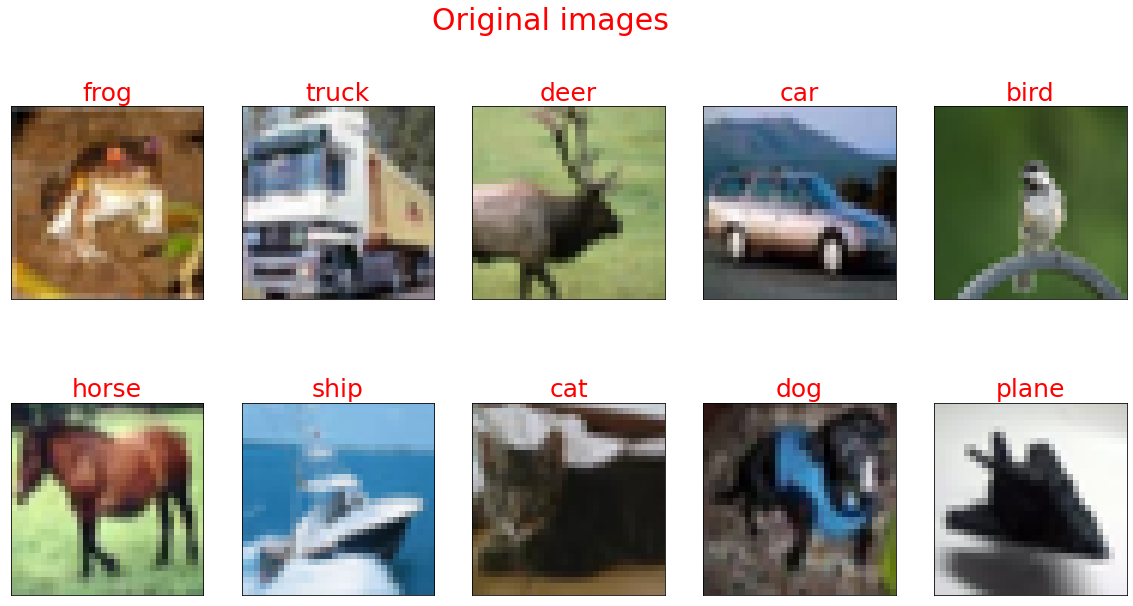

In [9]:
# Obtaining CIFAR 10 images 

# Downloading CIFAR 10 via Tensorflow 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Frog 
frog = x_train[0]
#plt.imshow(frog)

# Truck 
truck = x_train[1]
#plt.imshow(truck)

# Deer
deer = x_train[34]
#plt.imshow(deer)

# Automobile 
car = x_train[4]
#plt.imshow(car)

# Bird 
bird = x_train[54]
#plt.imshow(bird)

# Horse 
horse = x_train[7]
#plt.imshow(horse)

# Ship 
ship = x_train[8]
#plt.imshow(ship)

# Cat
cat = x_train[9]
#plt.imshow(cat)

# Dog 
dog = x_train[27]
#plt.imshow(dog)

# Plane 
plane = x_train[29]
#plt.imshow(plane)

img = [frog, truck, deer, car, bird, horse, ship, cat, dog, plane]
titles = ['frog', 'truck', 'deer', 'car', 'bird', 'horse', 'ship', 'cat', 'dog', 'plane']

# Plotting the original images 
plt.figure(figsize=(20,10))
for i in range(len(img)):
    plt.subplot(2,5,i+1), plt.imshow(img[i])
    plt.title(titles[i], color='red',fontsize=25)
    plt.xticks([]), plt.yticks([])

plt.suptitle(t='Original images', color='red', fontsize=30)
plt.show()

# Problem 1: Hough Transform 

For 10 images from the 10 classes of the CIFAR-10 dataset: 

1. Apply Hough Transform 
2. Apply Circle Detection Hough Transform. Plot line and circle detection outputs for each image. 

For both algorithms, explore different parameters and fine-tune them (i.e increasing/decreasing threshold values of the line and circle detector). <br>
Justify your choice of values for parameters for both algorithms. 


In [12]:
def plot_ls(image_ls,title):
    title = str(title)

    plt.figure(figsize=(15,10))
    for i in range(len(image_ls)):
        plt.subplot(2,5,i+1), plt.imshow(image_ls[i],cmap='gray')
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t=title, color='red', fontsize=30)
    plt.show()
    


def hough_lineP(images, rho=1, theta=np.pi/180, threshold=10):

    image_ls = []
    canny_im = [] 
    for i in range(len(images)): 
        #image = np.copy(images[i])  # FIX ME 
        image = np.ascontiguousarray(images[i], dtype=np.uint8)
        gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Applying grayscale 
        gauss = cv2.GaussianBlur(gray, (5, 5), 1)        # Applying Gaussian filter 
        edges = cv2.Canny(gray, 50, 150, apertureSize=3) # Applying Canny Edge 

        canny_im.append(edges)

        lines = cv2.HoughLinesP(
            edges,                  # Input edge image
            rho=rho,                # Distance resolution in pixels
            theta=theta,            # Angle resolution in radians
            threshold=threshold,    # Min number of votes for valid line
            minLineLength=1,        # Min allowed length of line
            maxLineGap=1            # Max allowed gap between line for joining them
        )

        for points in lines:
            x1, y1, x2, y2 = points[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        image_ls.append(image)

    # Plotting transformed images 
    #plot_ls(canny_im,'Canny Edge')
    plot_ls(image_ls,'Hough Line, rho='+str(rho)+ ' , Threshold='+str(threshold))



    return image_ls

### Adjusting rho

In [13]:
hough_ls = hough_lineP(img, rho=1, theta=np.pi/180, threshold=10)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'img'


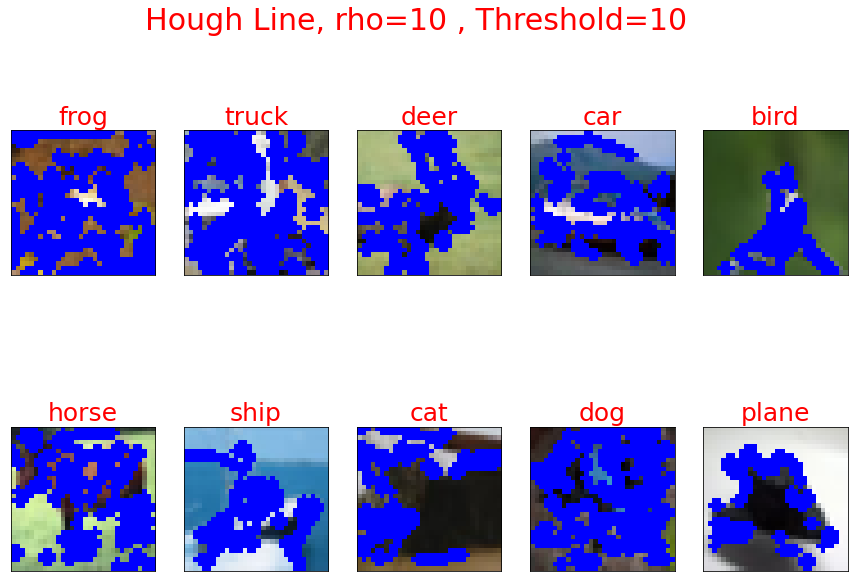

In [53]:
# With a higher value for rho, we see that there are less lines detected. 
hough_ls = hough_lineP(img, rho=10, theta=np.pi/180, threshold=10)

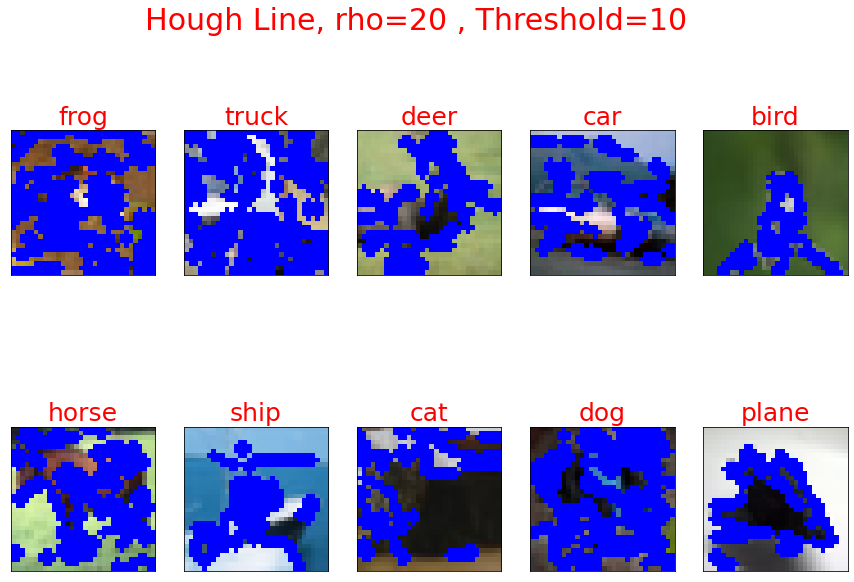

In [54]:
hough_ls = hough_lineP(img, rho=20, theta=np.pi/180, threshold=10)

### Adjusting Theta

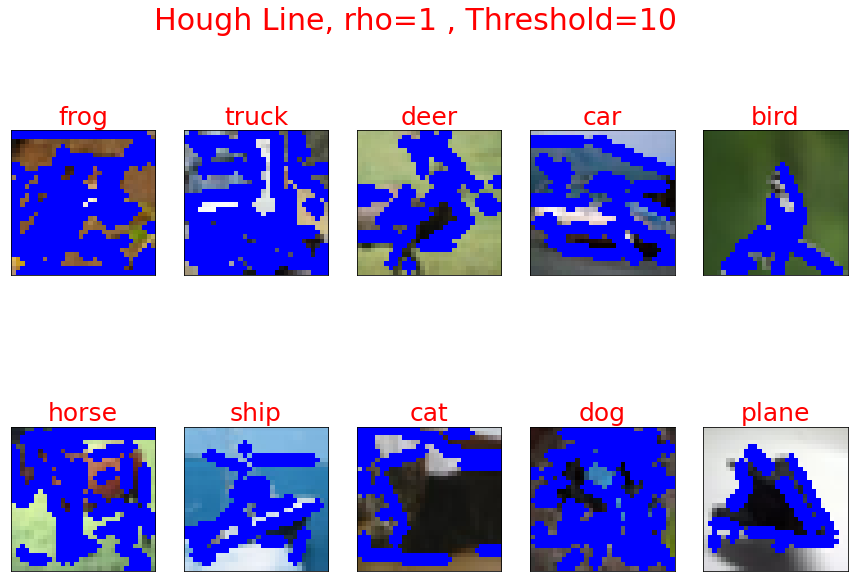

In [49]:
# Setting theta = pi/180
hough_ls = hough_lineP(img, rho=1, theta=np.pi/180, threshold=10)

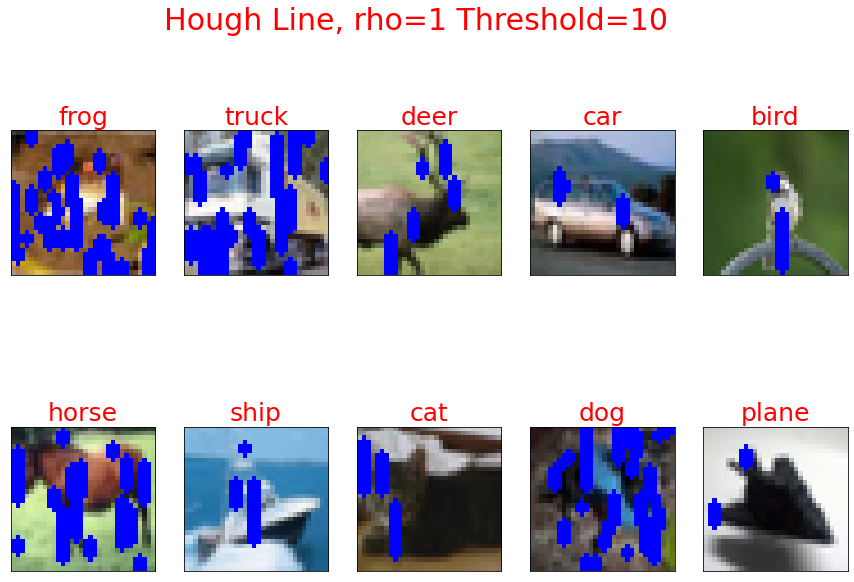

In [41]:
# Setting theta = pi
hough_ls = hough_lineP(img, rho=1, theta=np.pi, threshold=10)

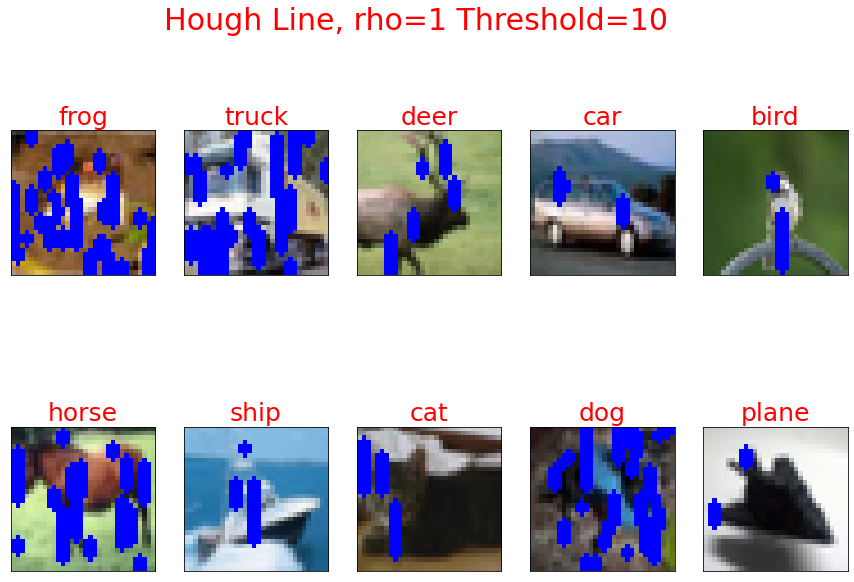

In [40]:
# Setting theta = 2pi
hough_ls = hough_lineP(img, rho=1, theta=np.pi*2, threshold=10)

### Adjusting Threshold

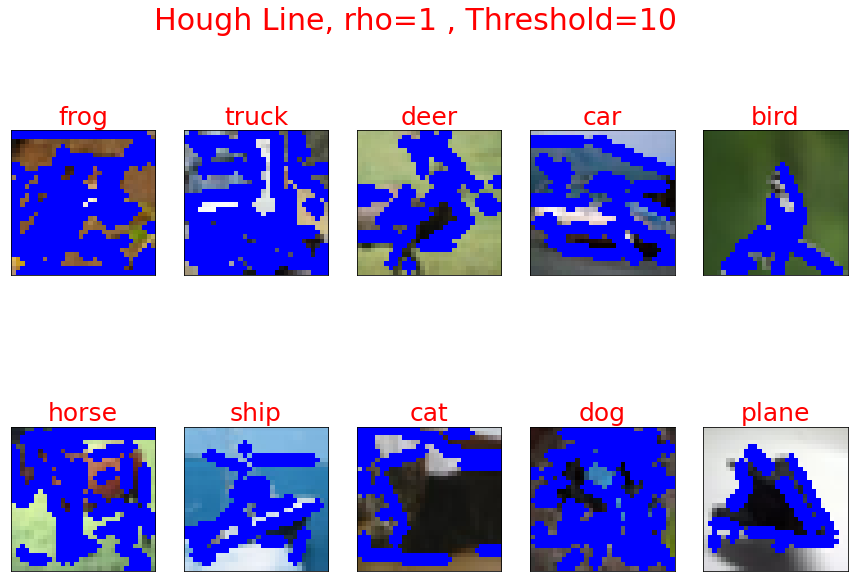

In [50]:
# The threshold parameter serves as a counter/accumulator for how many "votes" a line gets to be detected and considered a line. 
# The line is not considered a line if its' number of "votes" is less than the threshold value. 
# Setting a threshold value too high will result in not many lines being detected. (or no lines being detected)
# Setting a threshold value too low will result in many lines being detected. 
# One drawback from this is that you may get false lines.



# Lower the thershold, the more lines are detected
hough_ls = hough_lineP(img, rho=1, theta=np.pi/180, threshold=10)

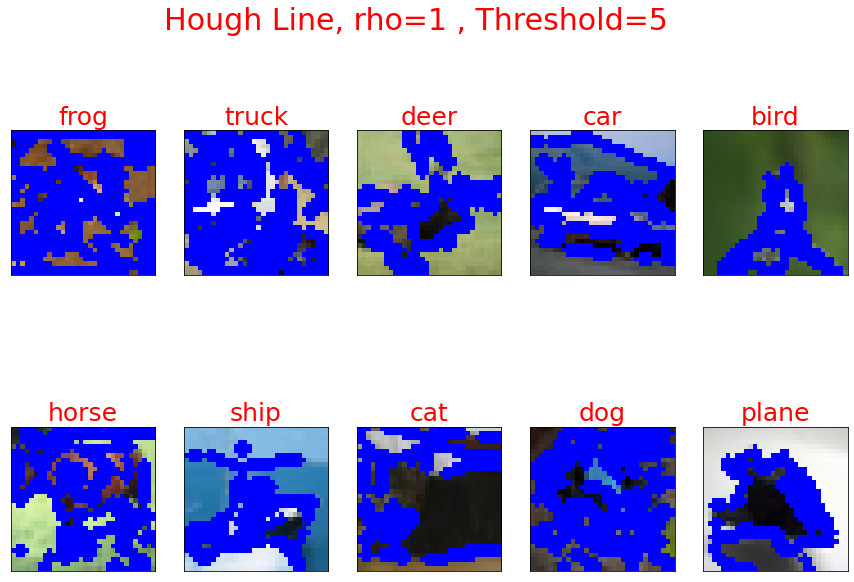

In [51]:
hough_ls = hough_lineP(img, rho=1, theta=np.pi/180, threshold=5)

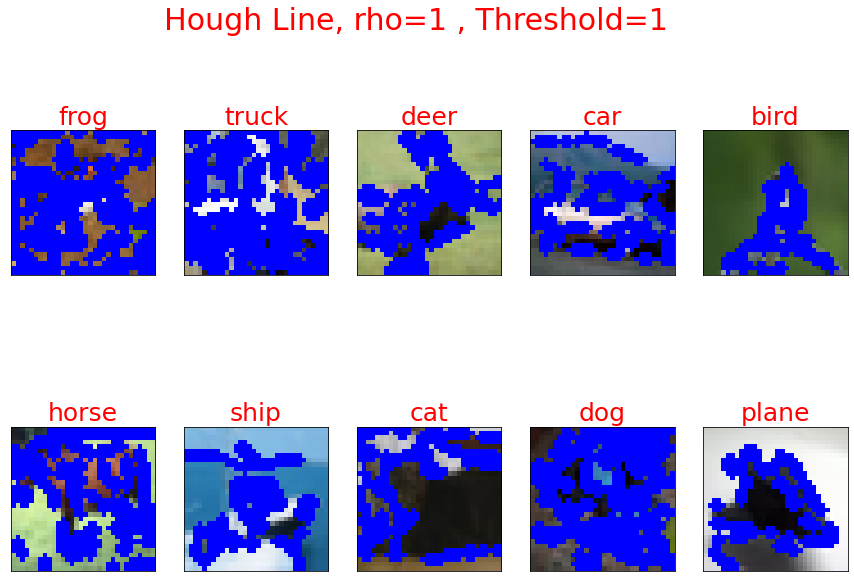

In [52]:
hough_ls = hough_lineP(img, rho=1, theta=np.pi/180, threshold=1)

### Finding ideal params

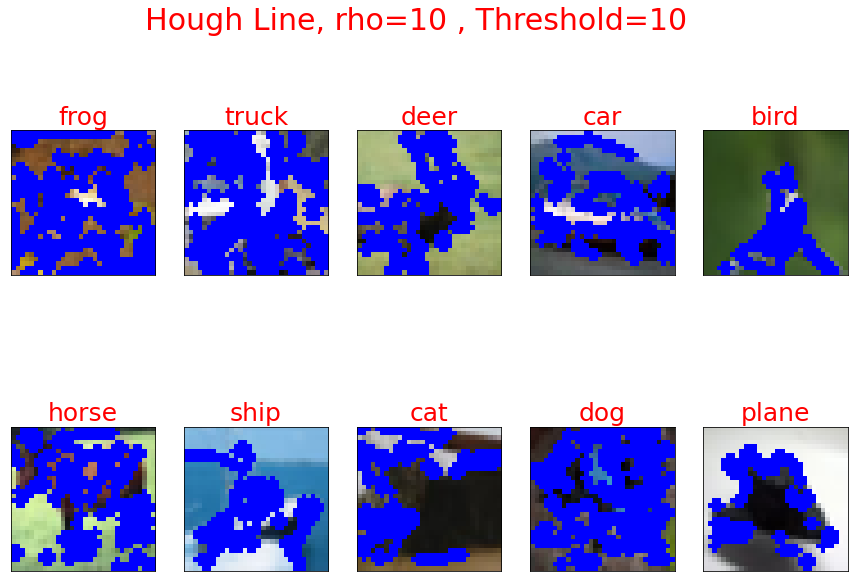

In [16]:
hough_ls = hough_lineP(img, rho=10, theta=np.pi/180, threshold=10)

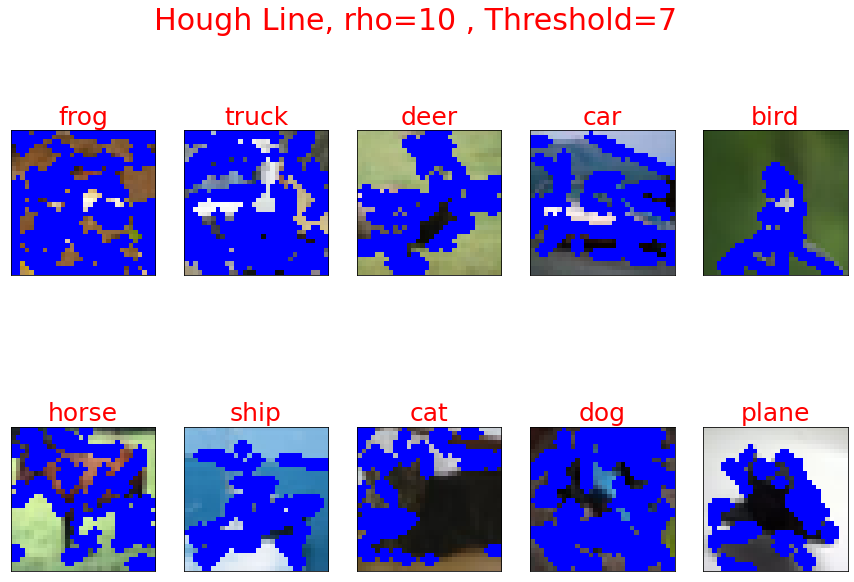

In [22]:
hough_ls = hough_lineP(img, rho=10, theta=np.pi/180, threshold=7)

## Circle Hough 

In [20]:
def hough_circles(images,dp=2,minDist=20,param1=25,param2=35):


    image_ls = []
    for i in range(len(images)): 
        image = np.ascontiguousarray(images[i], dtype=np.uint8)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply a Gaussian blur to the image to reduce noise
        blur = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply the Hough Circle Transform
        circles = cv2.HoughCircles(blur,                # image 
                                cv2.HOUGH_GRADIENT,     # Detection method 
                                dp=dp,                  # dp: Inverse ratio of the accumulator resolution to the image resolution.
                                                        # dp=1  accumulator has same resolution to image, dp=2 accumulator is half the resolution 
                                minDist=minDist,        # Minimum distance between circles
                                param1=param1,          # Higher threshold of the 2 passed in a Cannyedge algo
                                param2=param2,          # Method specific param
                                                        # HOUGH_GRADIENT: accumulator threshold for circle centers (detection stage). smaller, more false circles 
                                                        # HOUGH_GRADIENT_ALT: Measure of circle "perfectness". Closer to 1, better the shape of the circle. usually use 0.9
                                minRadius=0, 
                                maxRadius=0)

        # Draw the circles on the image
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (x, y, r) in circles:
                cv2.circle(image, (x, y), r, (0, 255, 0), 2)
        image_ls.append(image)

        #plt.imshow(image)

    plot_ls(image_ls,'Hough Circle: dp='+str(dp)+' ,minDist='+str(minDist) +' ,param1='+str(param1)+ ', param2='+str(param2))

### Adjusting dp

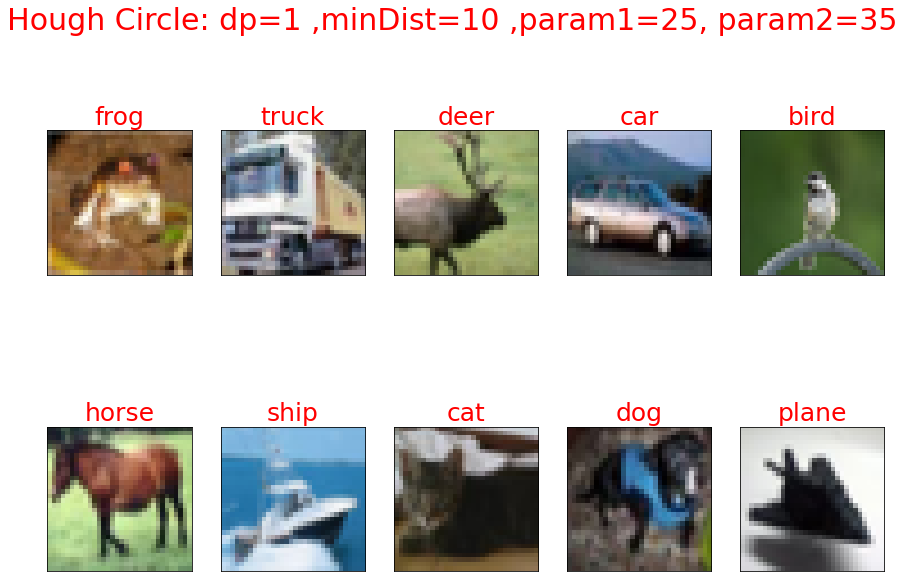

In [29]:
hough_circles(img,dp=1,minDist=10,param1=25,param2=35)

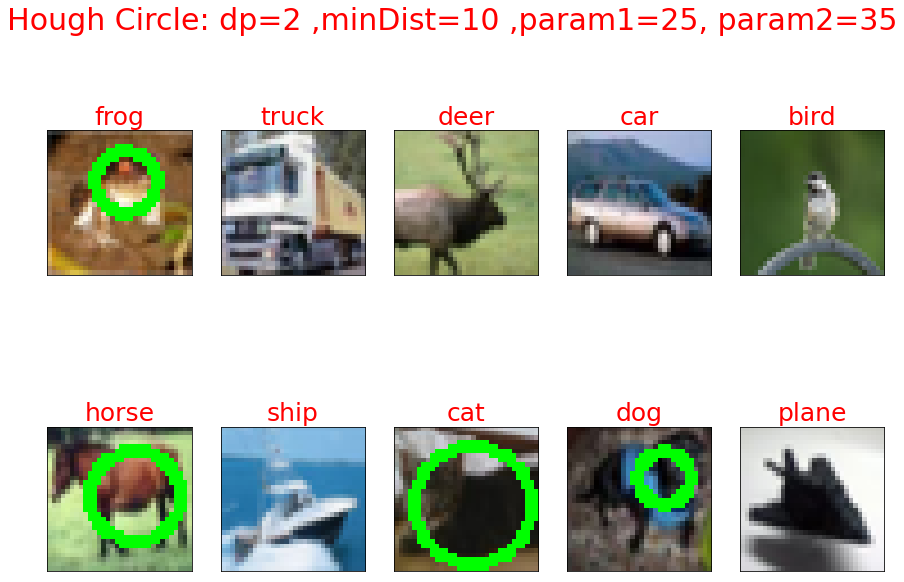

In [30]:
hough_circles(img,dp=2,minDist=10,param1=25,param2=35)

### Adjusting minDist

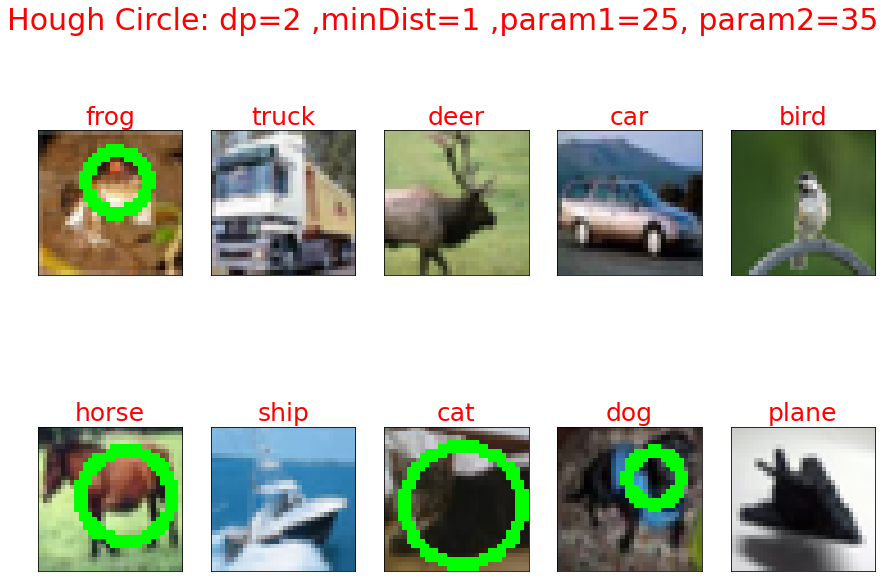

In [35]:
hough_circles(img,dp=2,minDist=1,param1=25,param2=35)

### Adjusting Param 1

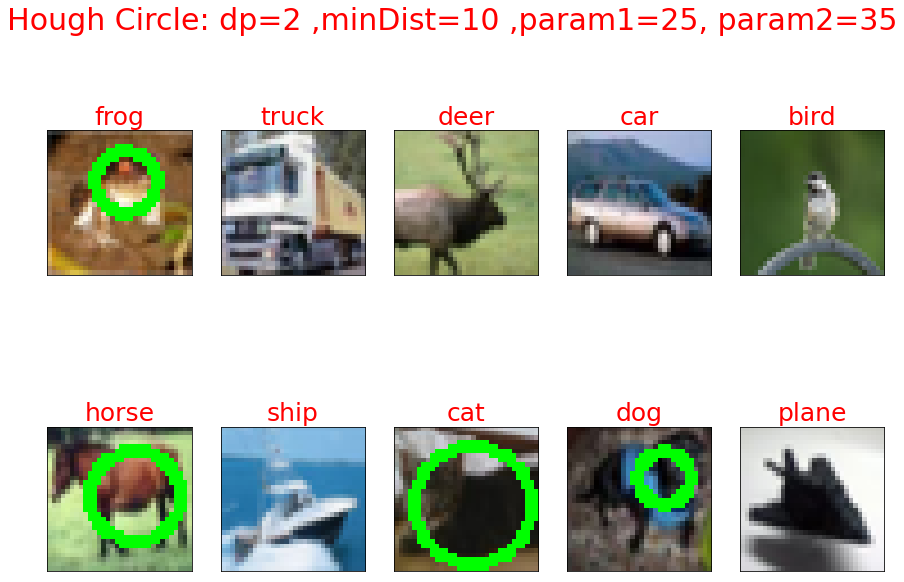

In [36]:
hough_circles(img,dp=2,minDist=10,param1=25,param2=35)

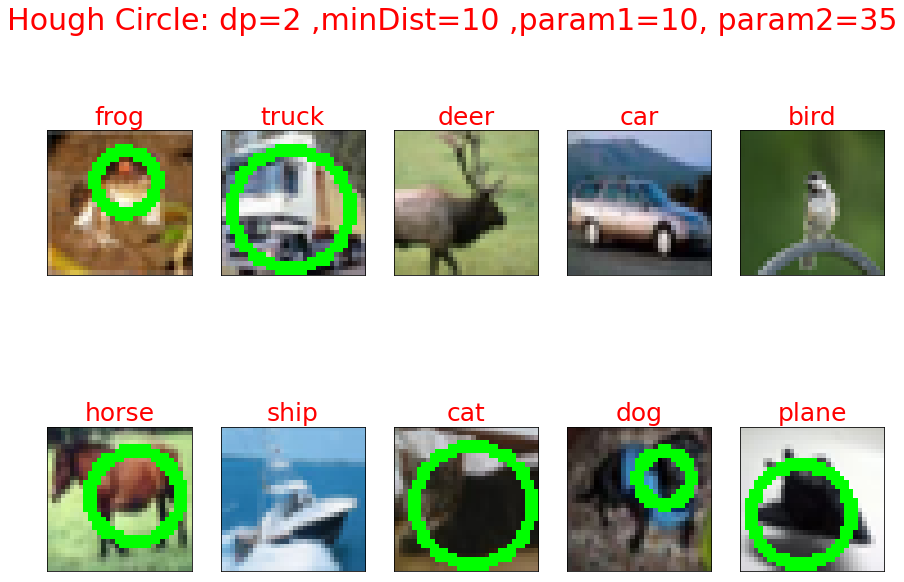

In [38]:
hough_circles(img,dp=2,minDist=10,param1=10,param2=35)

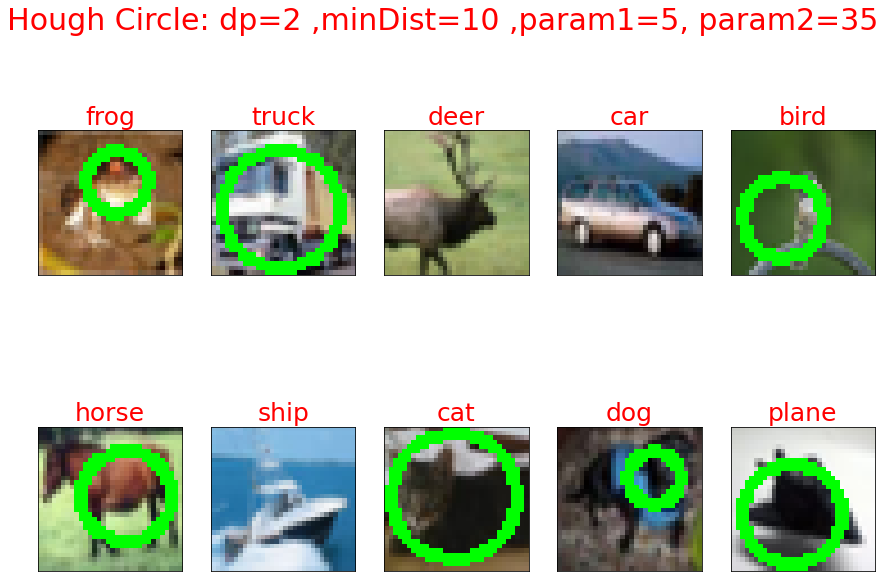

In [39]:
hough_circles(img,dp=2,minDist=10,param1=5,param2=35)

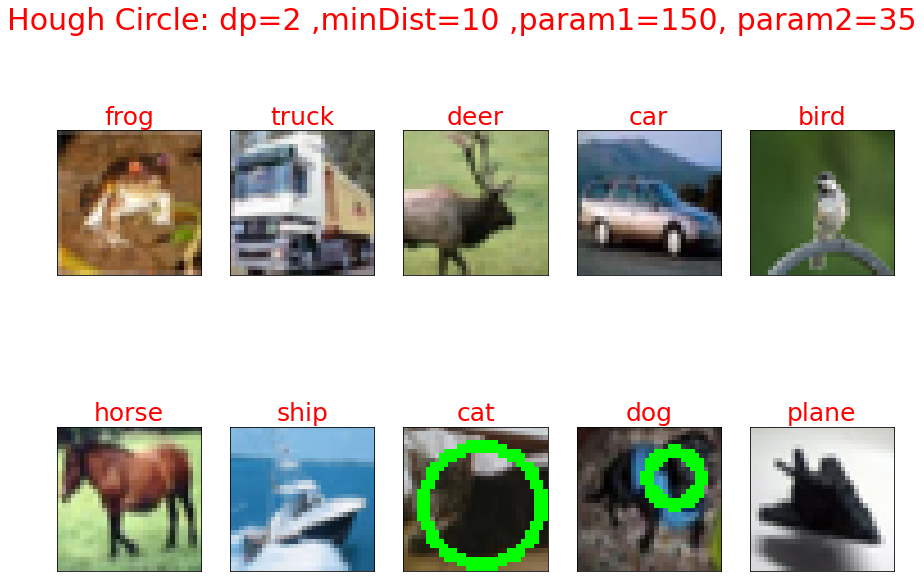

In [43]:
hough_circles(img,dp=2,minDist=10,param1=150,param2=35)

### Adjusting Param2

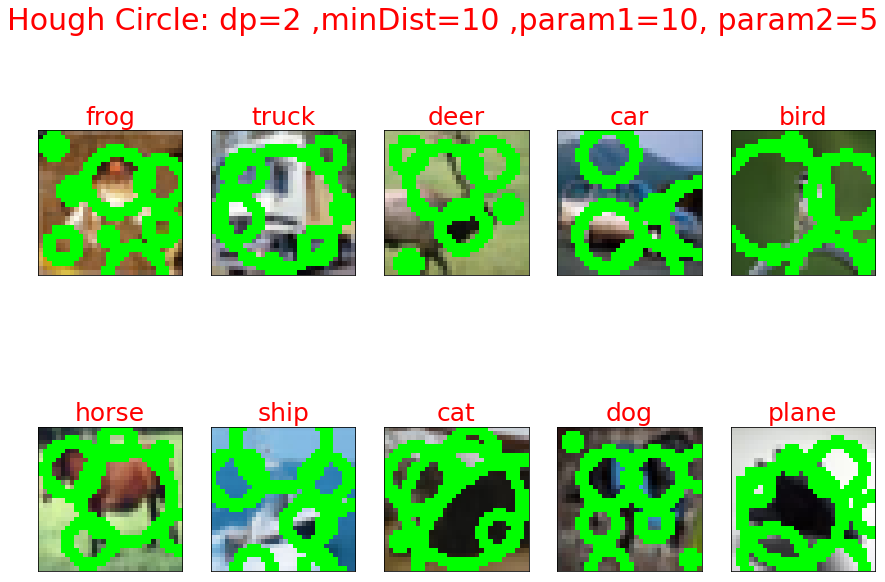

In [45]:
hough_circles(img,dp=2,minDist=10,param1=10,param2=5)

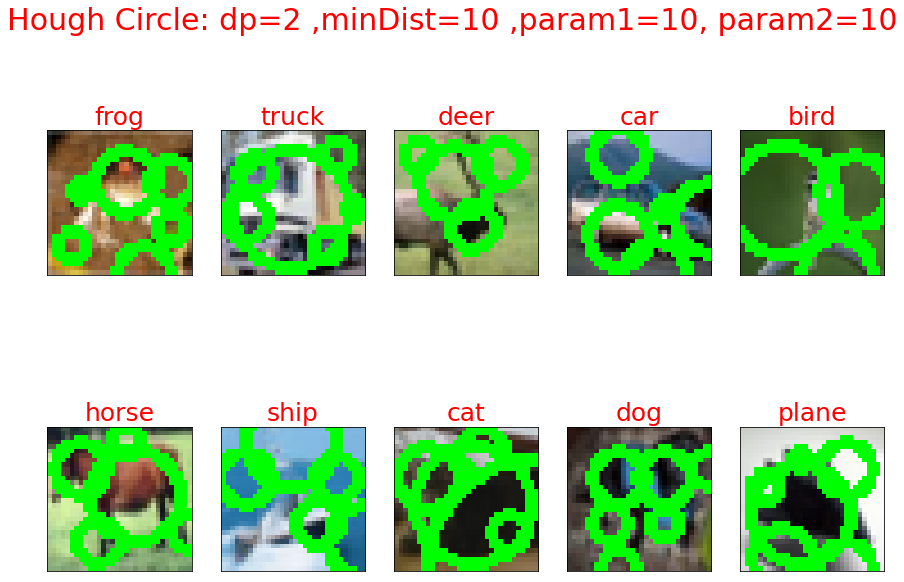

In [46]:
hough_circles(img,dp=2,minDist=10,param1=10,param2=10)

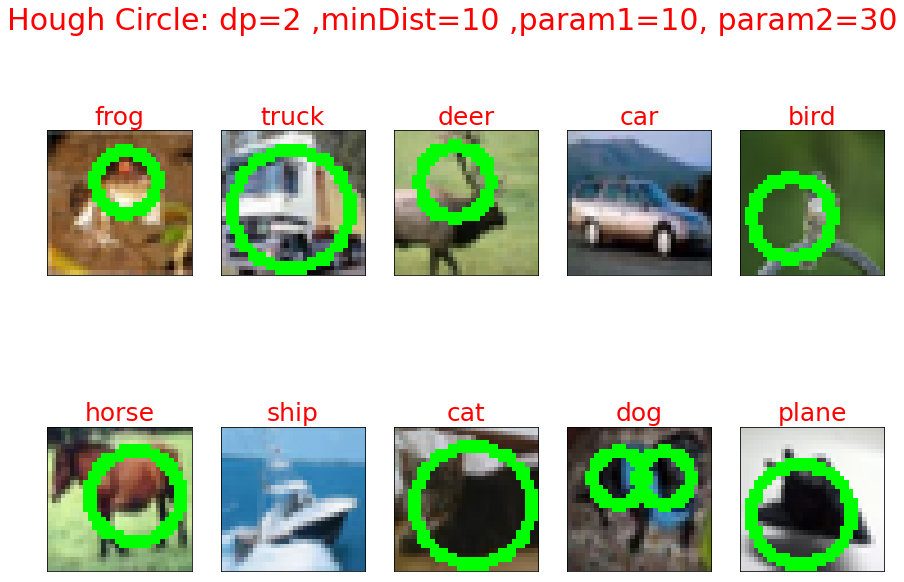

In [47]:
hough_circles(img,dp=2,minDist=10,param1=10,param2=30)

### Finding ideal params 

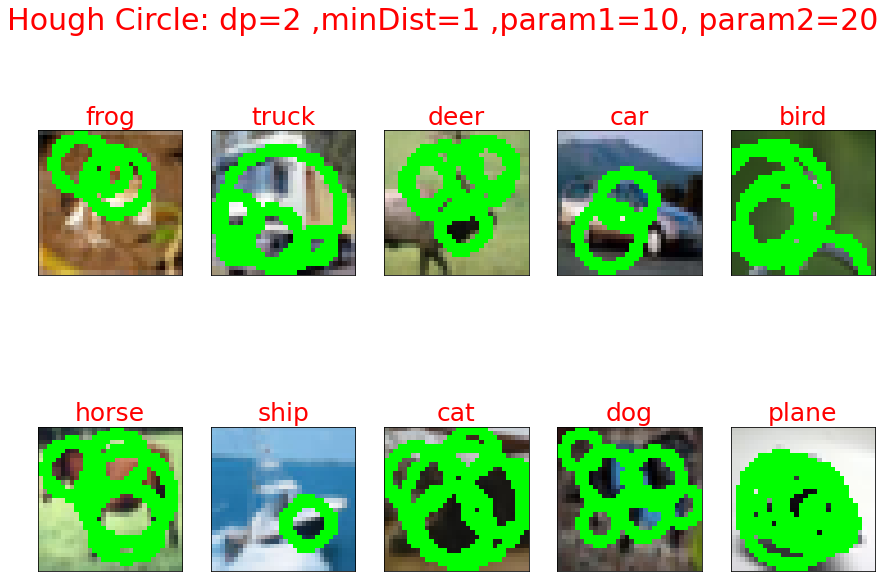

In [87]:
hough_circles(img,dp=2,minDist=1,param1=10,param2=20)

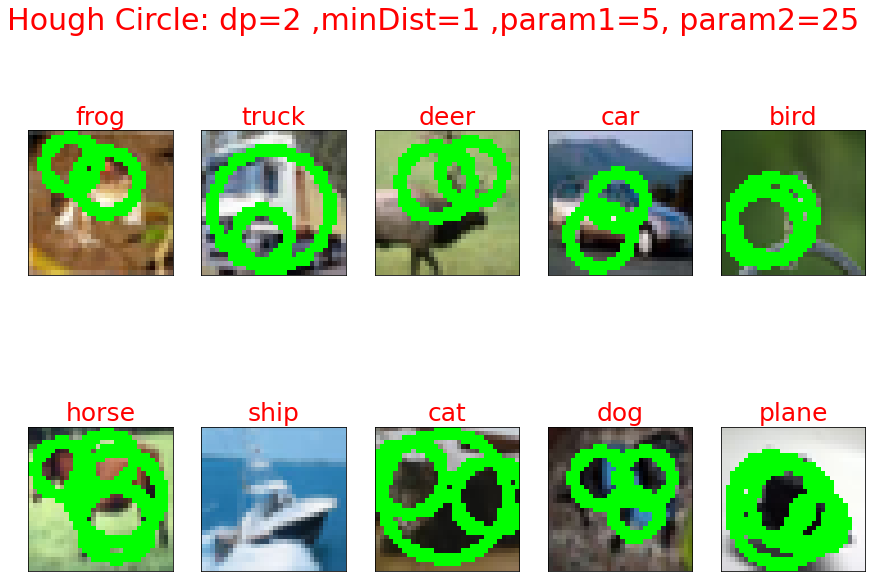

In [97]:
hough_circles(img,dp=2,minDist=1,param1=5,param2=25)

# Problem 2: SIFT Feature detector and descriptor 

1. Apply SIFT to your 10 images. Study the effects of 
    - sigma and edge threshold
    - contrast threshold <br>

    Plot the interest points or key points detected by SIFT for all the images.<br> 
    Justify your choice of your parameter values. 


### Creating SIFT Function

In [3]:
# Creating SIFT function 

def SIFT(image, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6):

    image_cpy = np.copy(image)

    # PREPROCESSING: 
    # Applying downsampling 
    # Applying rotation to image. Rotation set to 30 degrees 
    # Applying grayscale to image


    source_im = cv2.cvtColor(image_cpy, cv2.COLOR_BGR2RGB)
    source_gray = cv2.cvtColor(source_im, cv2.COLOR_RGB2GRAY)

   
    # Downsampling 
    # Decreases the size of the image by 1/2. 
    # Scaling it down and rescaling to the original size will result in losing some information from the original.
    # Resolution will also be lower. 
    rotated_image = cv2.pyrDown(source_im) 
                                          

    # Creating rotated image
    rows, cols = rotated_image.shape[:2] 
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1) # (center, rotation, scale)
    
    # Affine transformation: A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation)
    rotated_image = cv2.warpAffine(rotated_image, rotation_matrix, (cols, rows)) 
    rotated_gray = cv2.cvtColor(rotated_image, cv2.COLOR_RGB2GRAY)


#############################################################################################################################################################################################
    # APPLYING SIFT 
    # Creating SIFT detector 
    # Create keypoints and calculates descriptors 
    # Draw keypoints onto image 

    sift = cv2.SIFT_create(nfeatures=0, 
                           nOctaveLayers=3, 
                           contrastThreshold=contrastThreshold, # Filters out weak features in semi-uniform (low-contrast) regions. The larger the threshold, the less features are produced by the detector
                           edgeThreshold=edgeThreshold,         # filter out edge-like features. the larger the edgeThreshold, the less features are filtered out (more features are retained).
                           sigma=sigma)                         # sigma used at ocatave#0

    source_keypoints, source_descriptor = sift.detectAndCompute(source_gray, None) # Returns keypoints and descriptors 
    rotated_keypoints, rotated_descriptor = sift.detectAndCompute(rotated_gray, None)

    keypoints_with_size = np.copy(source_im)

    cv2.drawKeypoints(source_gray, source_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#############################################################################################################################################################################################
    # FEATURE MATCHING 
    # Creating brute force matcher to compare SIFT descriptors 
    # MATCH keypoints from original source to rotated image 
    # Plot results 

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = False)

    # Perform the matching between the SIFT descriptors of the source image and the rotated image
    matches = bf.match(source_descriptor, rotated_descriptor)

    # Sorting matches
    matches = sorted(matches, key = lambda x : x.distance)

    # Drawing matches 
    result = cv2.drawMatches(source_gray, source_keypoints, rotated_gray, rotated_keypoints, matches, rotated_image, flags = 2)


    # PLOTTING 
    plt.figure(figsize=(30,10))
    plt.subplot(1,2,1)
    plt.imshow(keypoints_with_size, cmap='gray')
    plt.title("Located Keypoints", color='red',fontsize=20)
    plt.xticks([]), plt.yticks([])

    
    plt.subplot(1,2,2)
    plt.imshow(result, cmap='gray')
    plt.title("Number of Matching Keypoints:"+str(len(matches)) , color='red',fontsize=20)
    plt.xticks([]), plt.yticks([])

    plt.suptitle(t='SIFT', color='red', fontsize=30)
    plt.show()





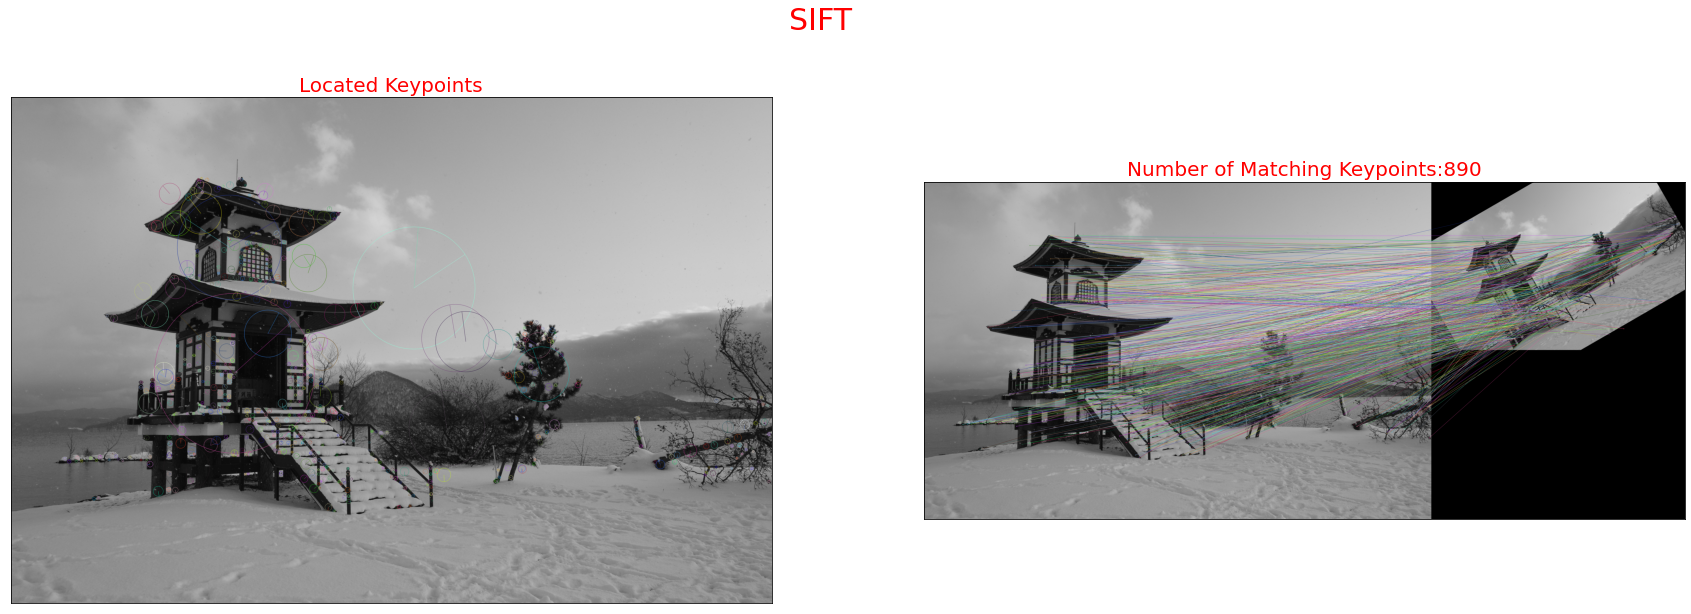

In [4]:
image = cv2.imread('snow_pagoda.JPG')

SIFT(image, contrastThreshold=0.1, edgeThreshold=100, sigma=10)

### Analysis: Sigma

The value of sigma here is the sigma term applied to a Gaussian filter. In this context, the larger the sigma value, the more "blurred" the resulting image becomes. 

In the SIFT algorithm, the sigma value is used to determine the scale of the blobs detected. 
A larger sigma value can detect larger blobs (larger keypoints), at the risk of smaller image details being smooothed out. 
A smaller sigma can detect smaller blobs (smaller keypoints). 
Using multiple sigma values allows SIFT to detect scale-invariant keypoints in an image. The effectiveness of the sigma value in detecting keypoints in the image depends on the image content. 

Reducing the value of sigma will result in more keypoints being detected. 

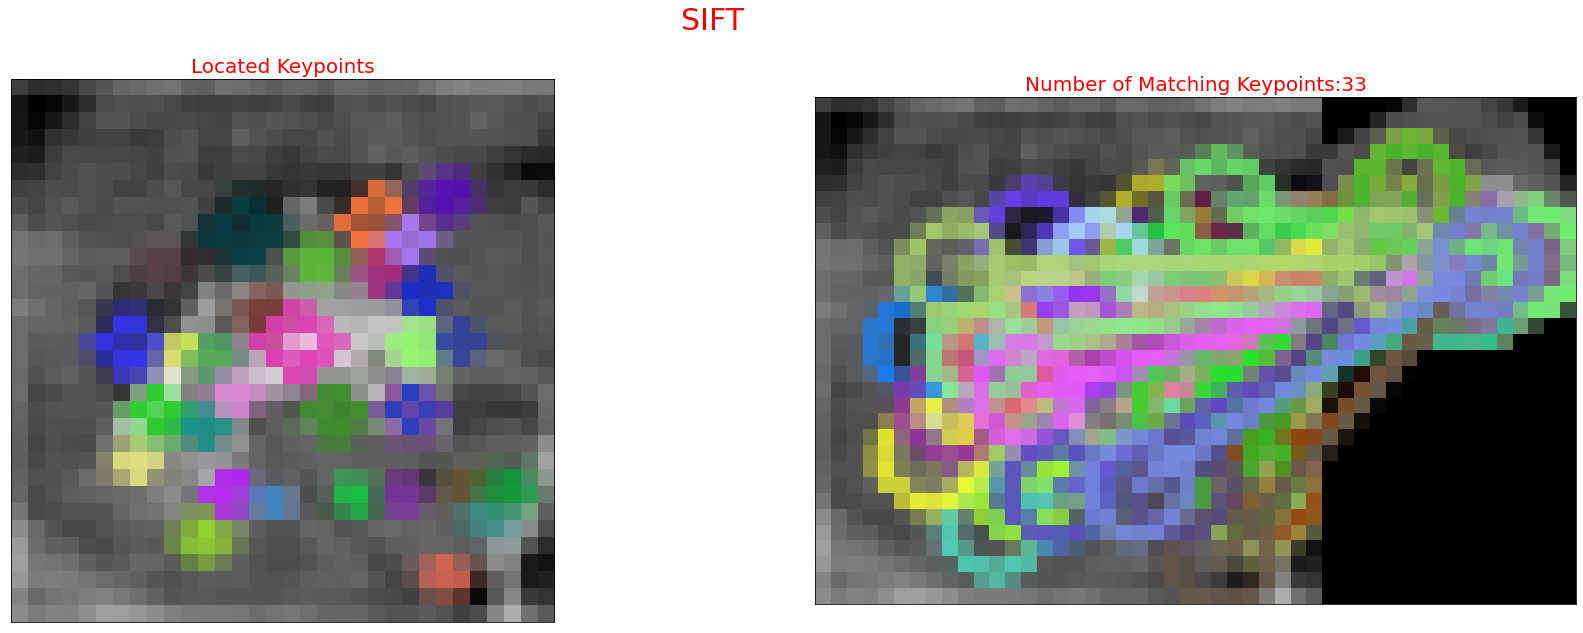

In [155]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=10, sigma=1)

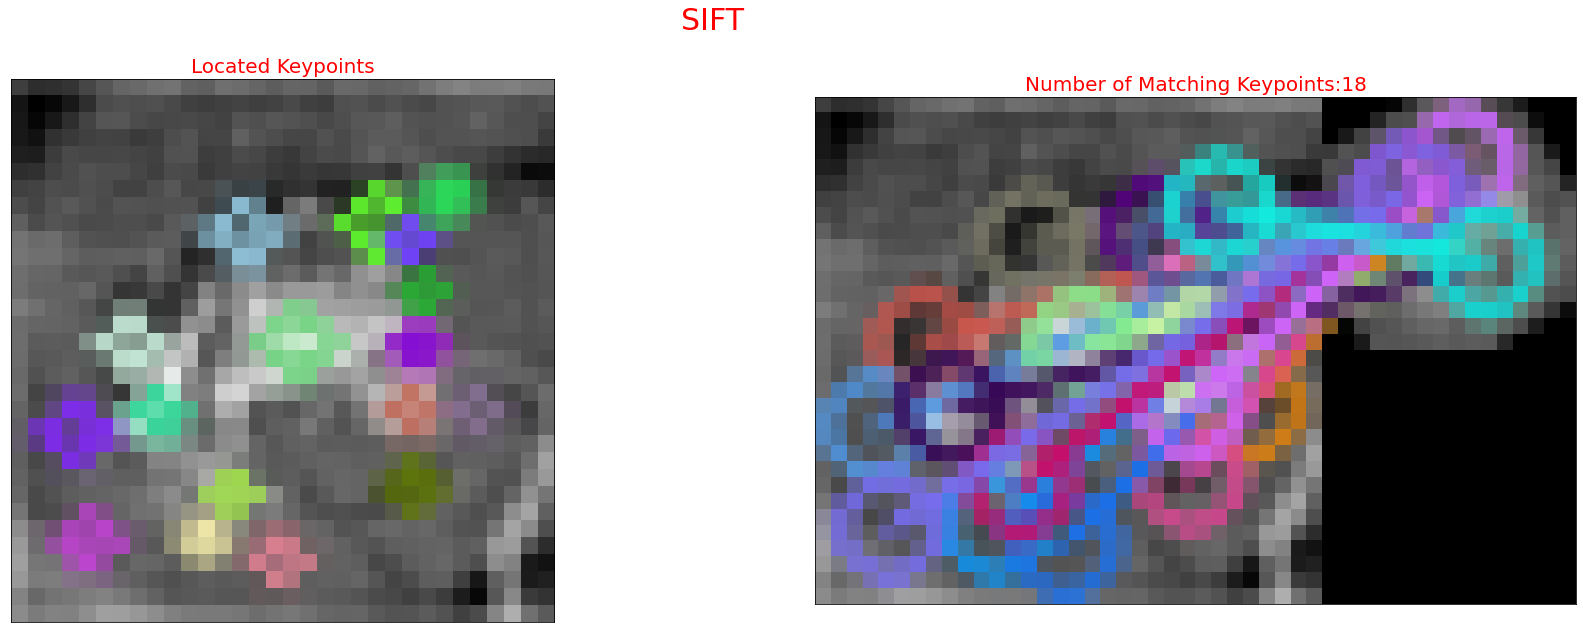

In [141]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

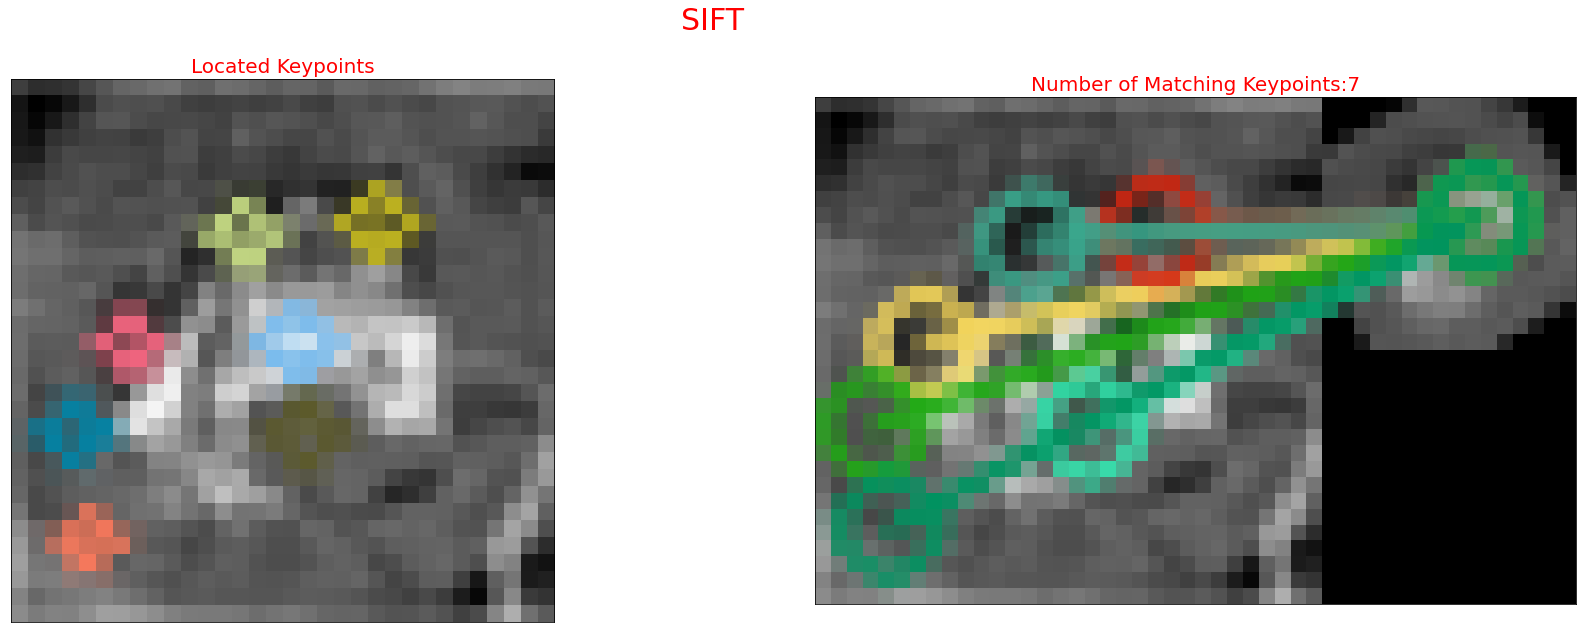

In [112]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=10, sigma=2.5)

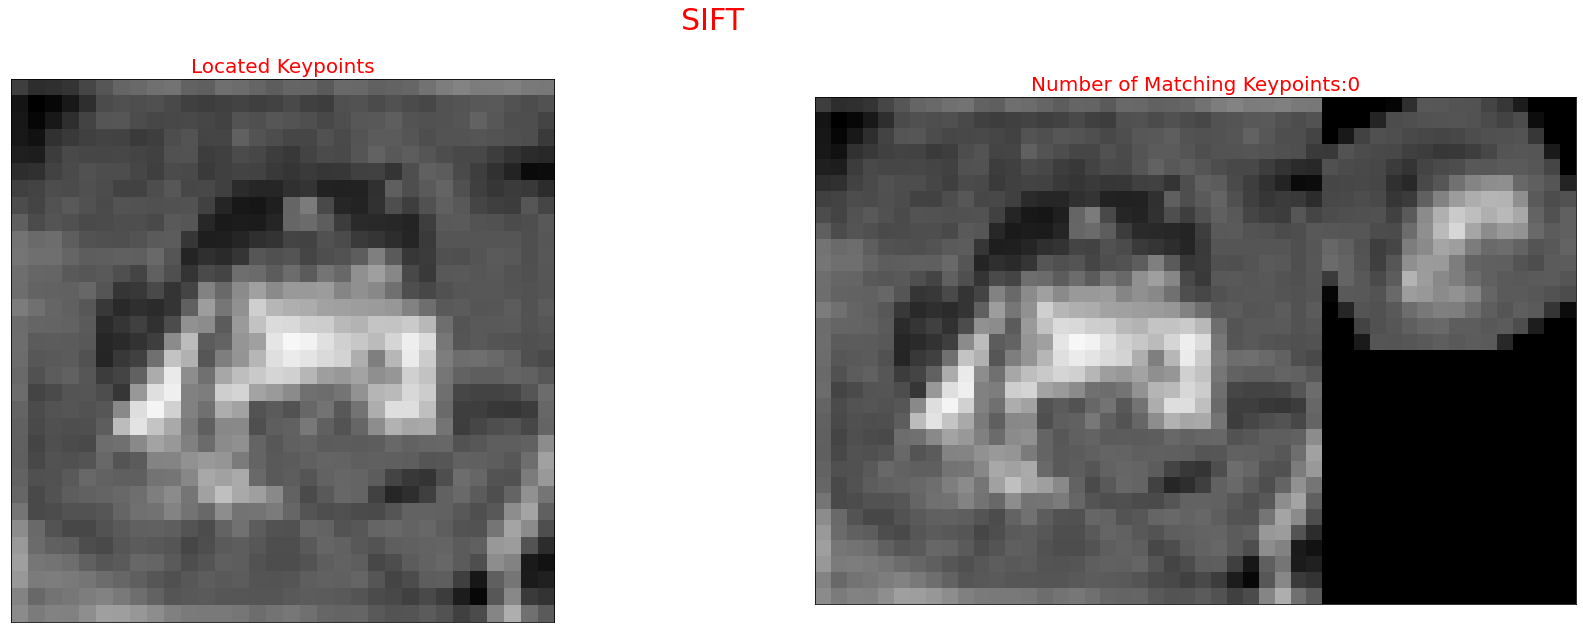

In [113]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=10, sigma=4)

### Analysis: Edge Threshold


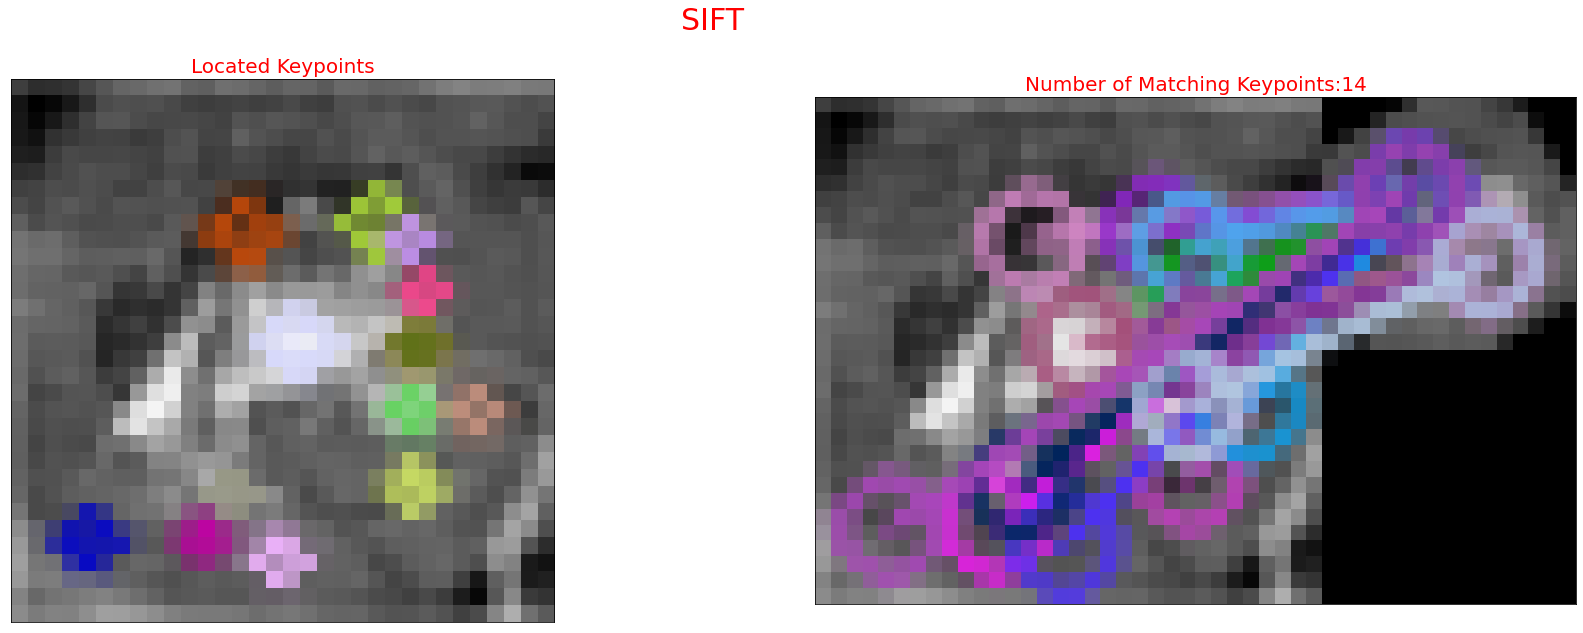

In [147]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=3, sigma=1.6)

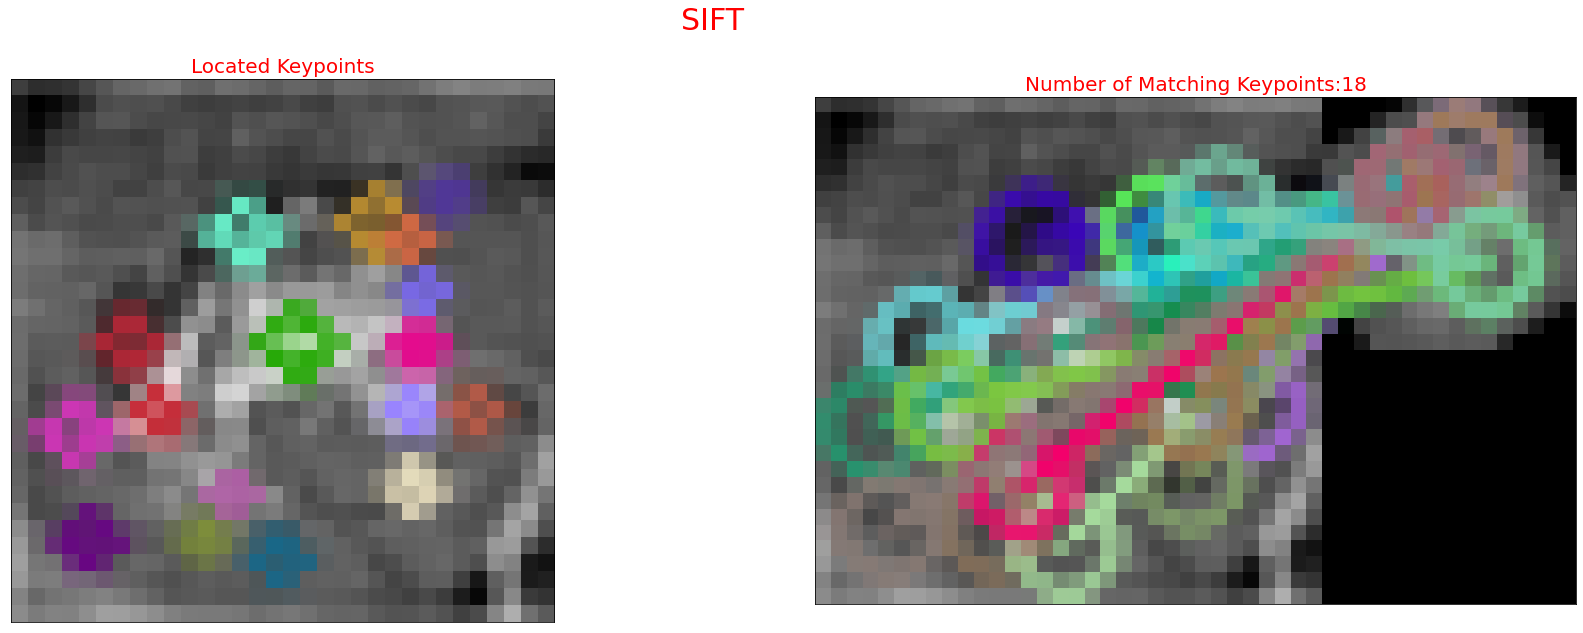

In [156]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=9, sigma=1.6)

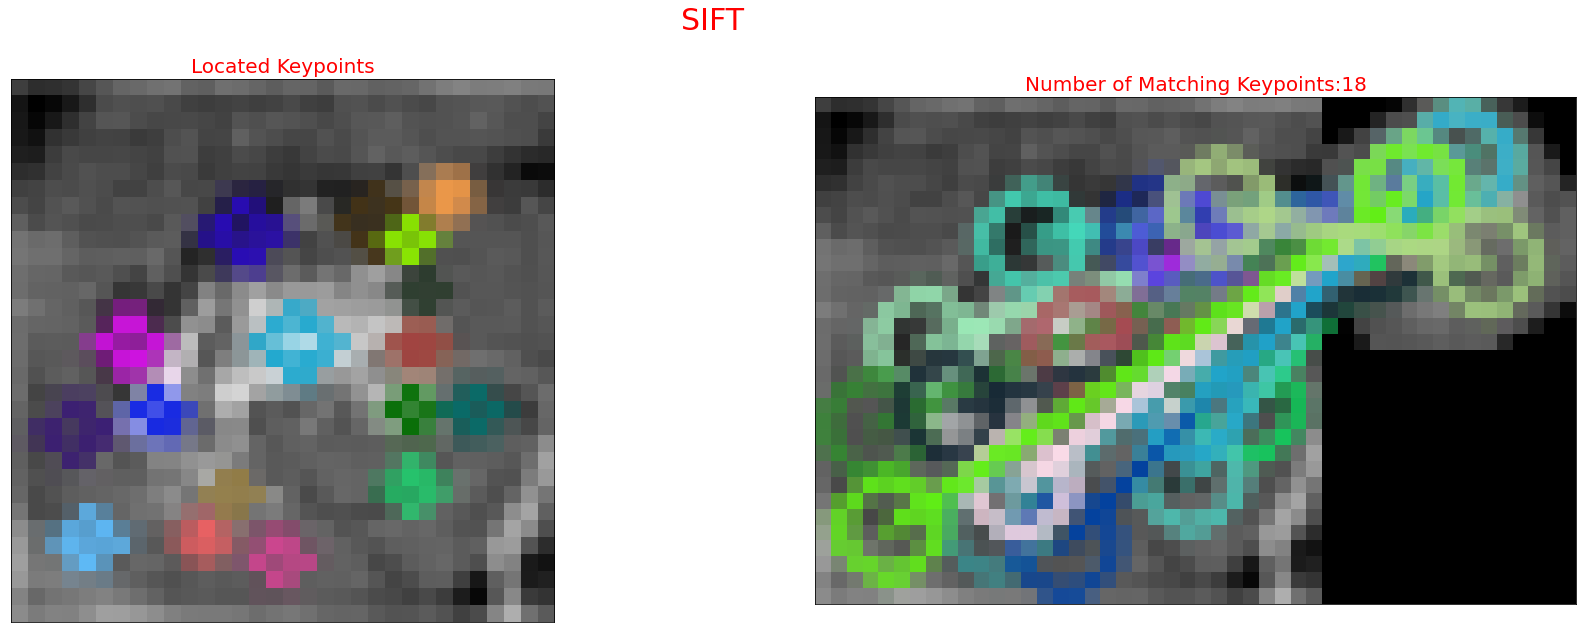

In [148]:
SIFT(frog, contrastThreshold=0.04, edgeThreshold=15, sigma=1.6)

### Analysis: Contrast Threshold

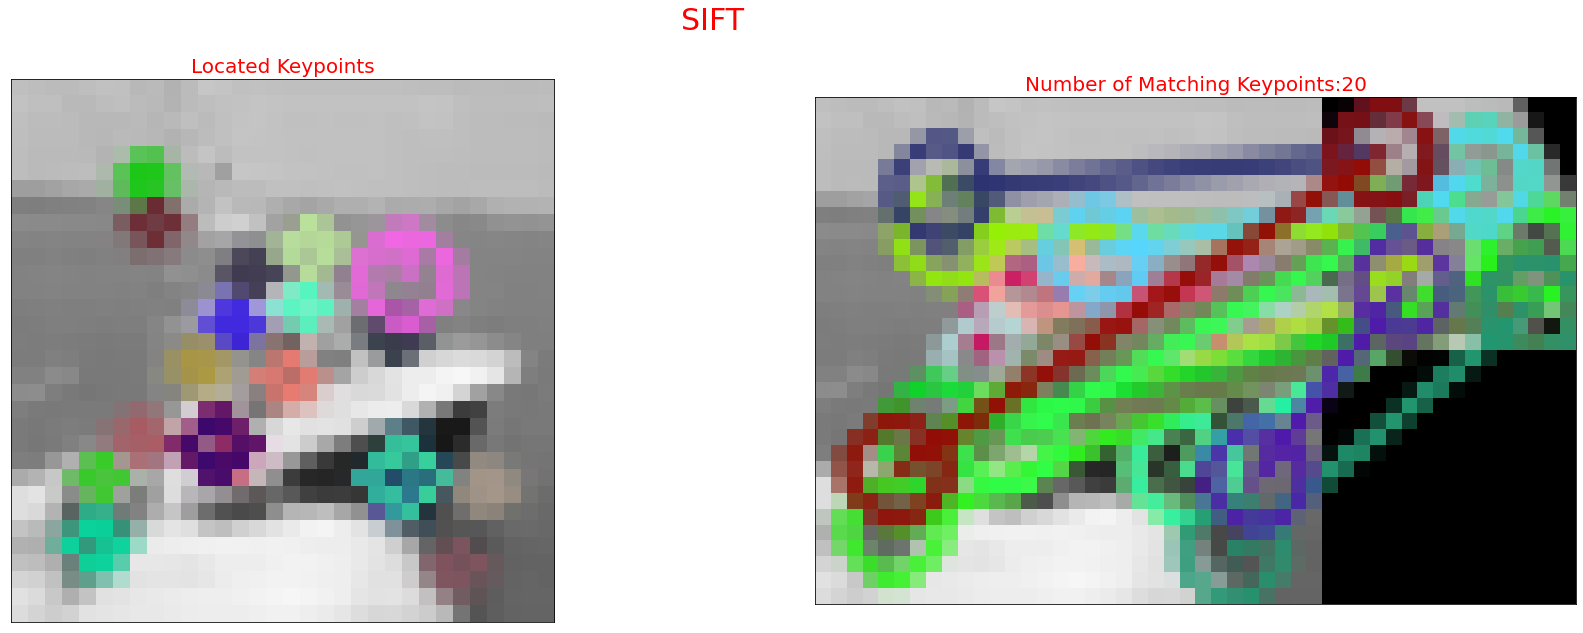

In [157]:
SIFT(ship, contrastThreshold=0.02, edgeThreshold=10, sigma=1.6)

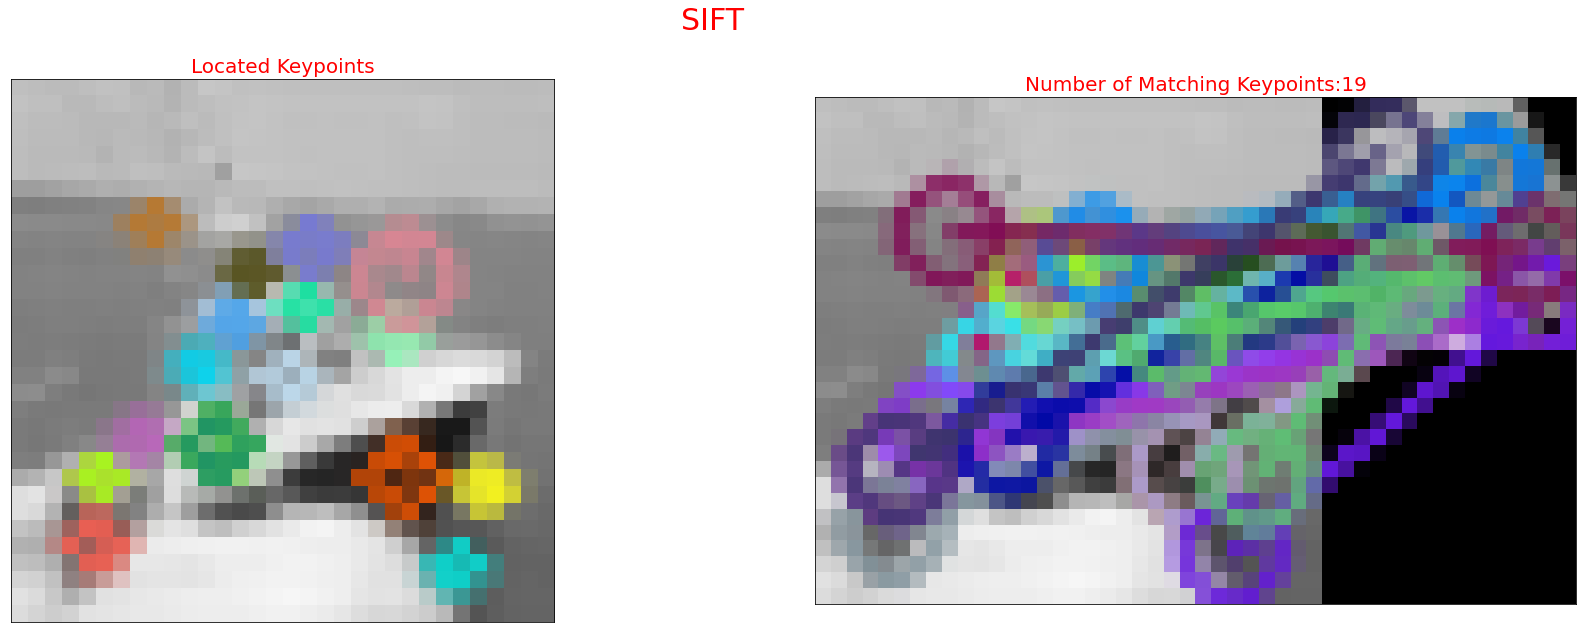

In [135]:
SIFT(ship, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

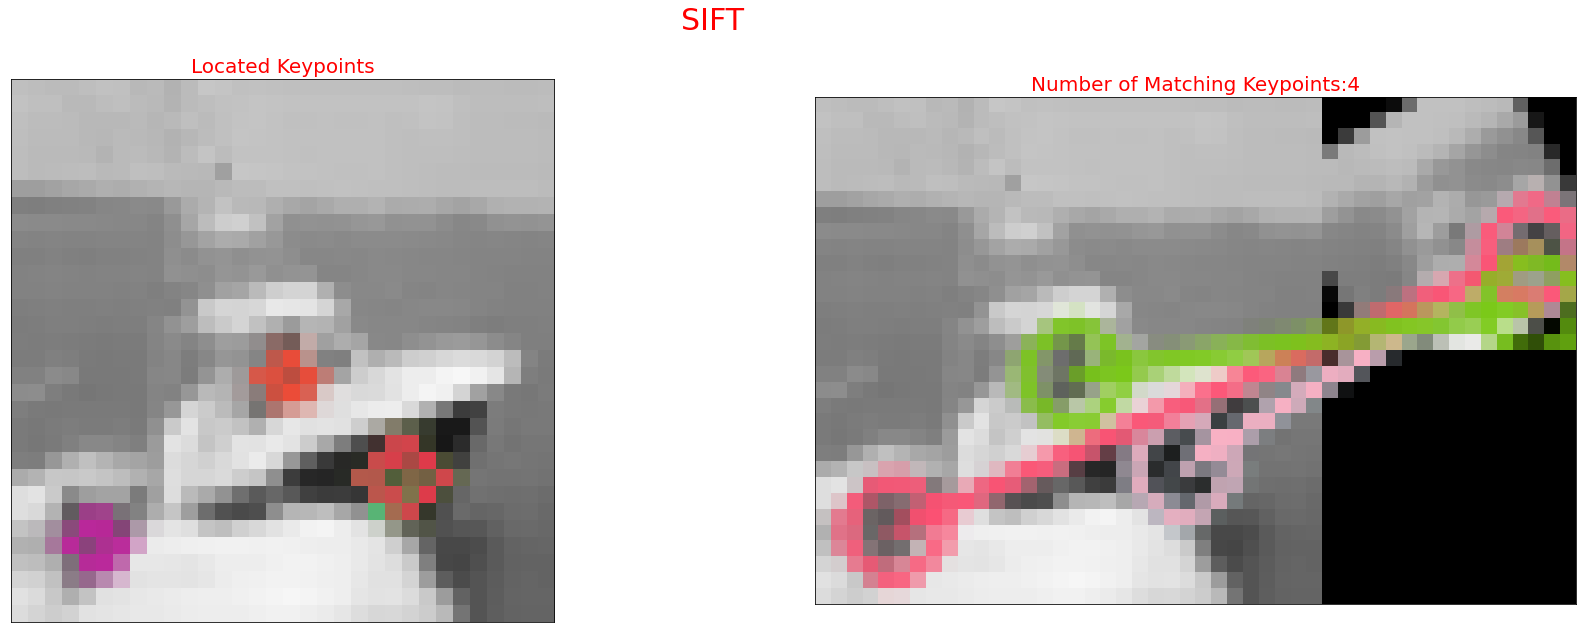

In [139]:
SIFT(ship, contrastThreshold=0.15, edgeThreshold=10, sigma=1.6)

### Rest of images 

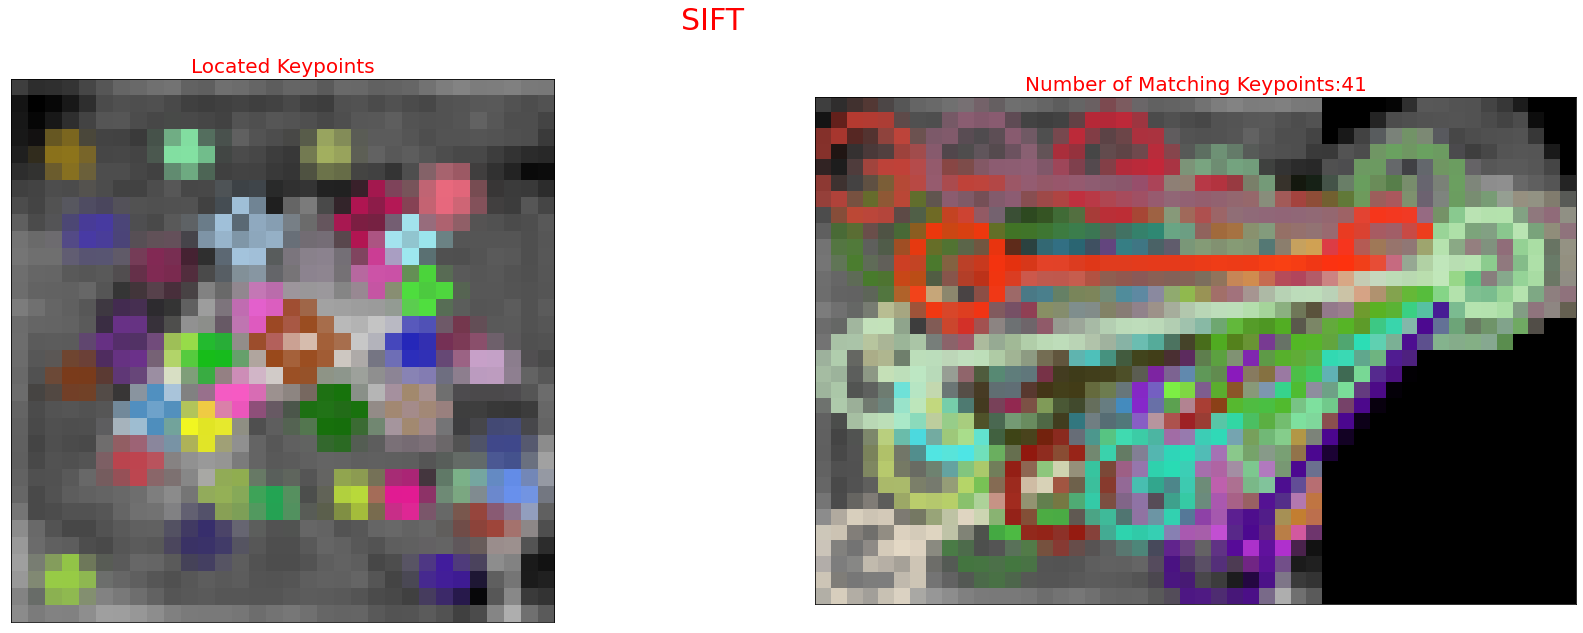

In [158]:
SIFT(frog, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

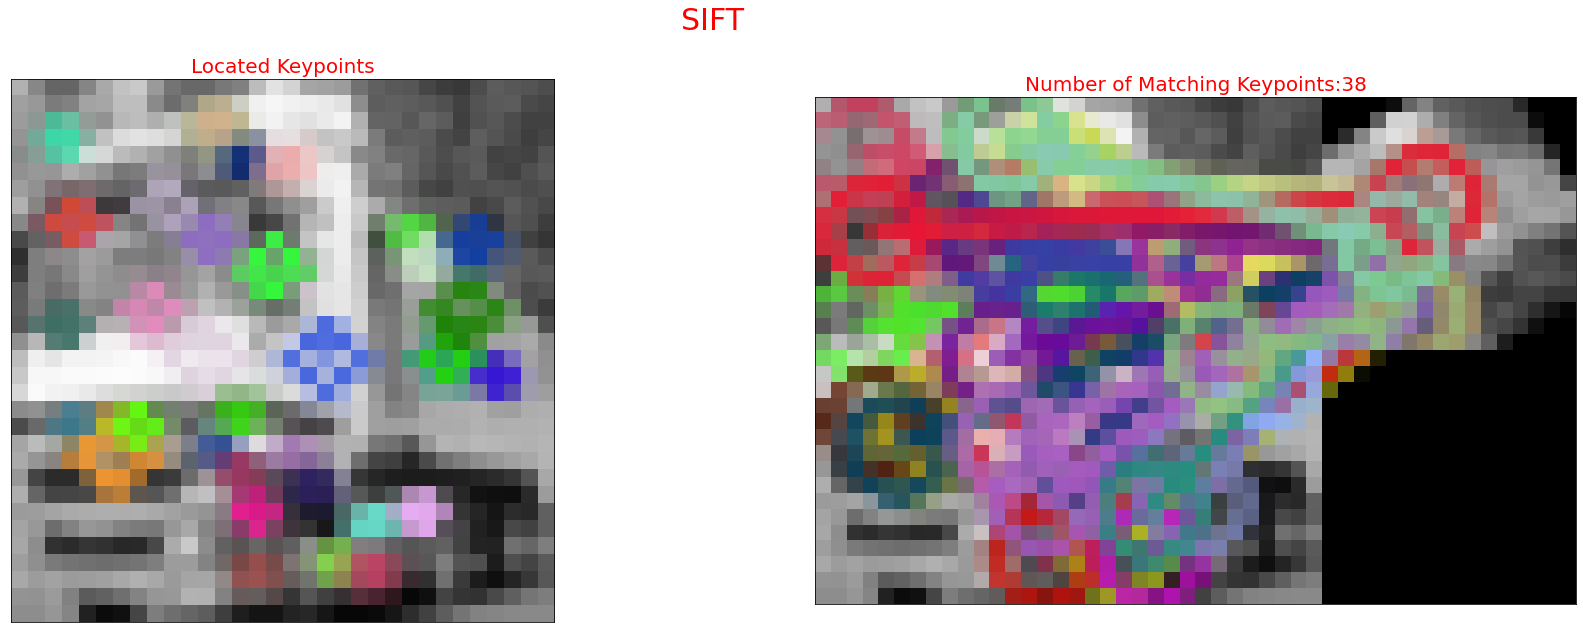

In [159]:
SIFT(truck, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

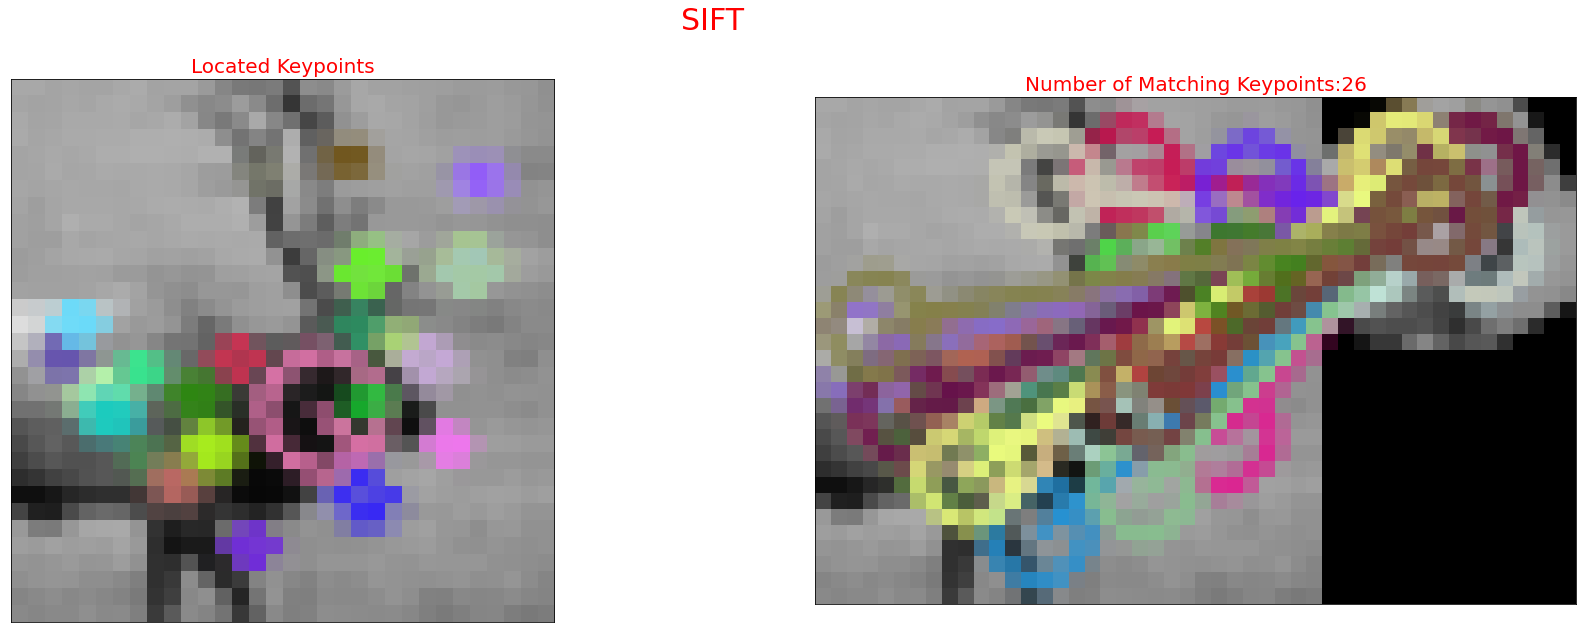

In [160]:
SIFT(deer, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

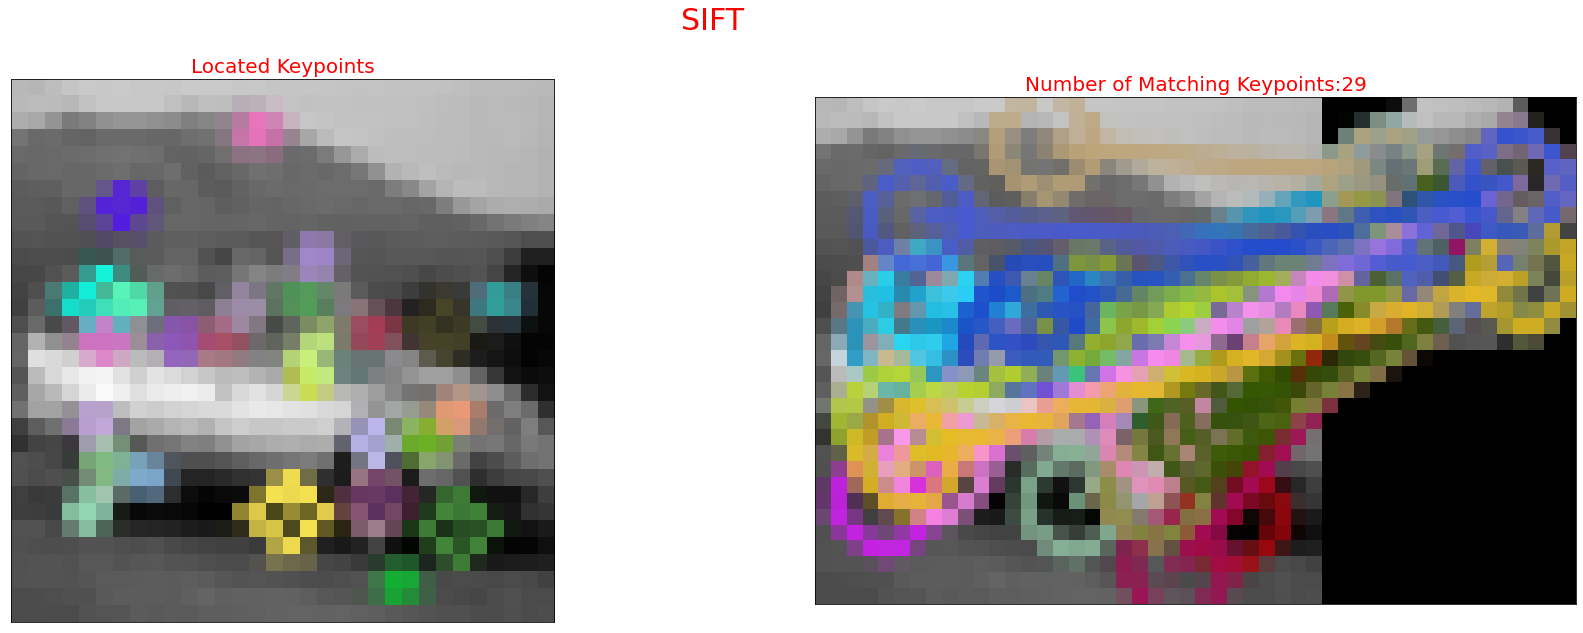

In [161]:
SIFT(car, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

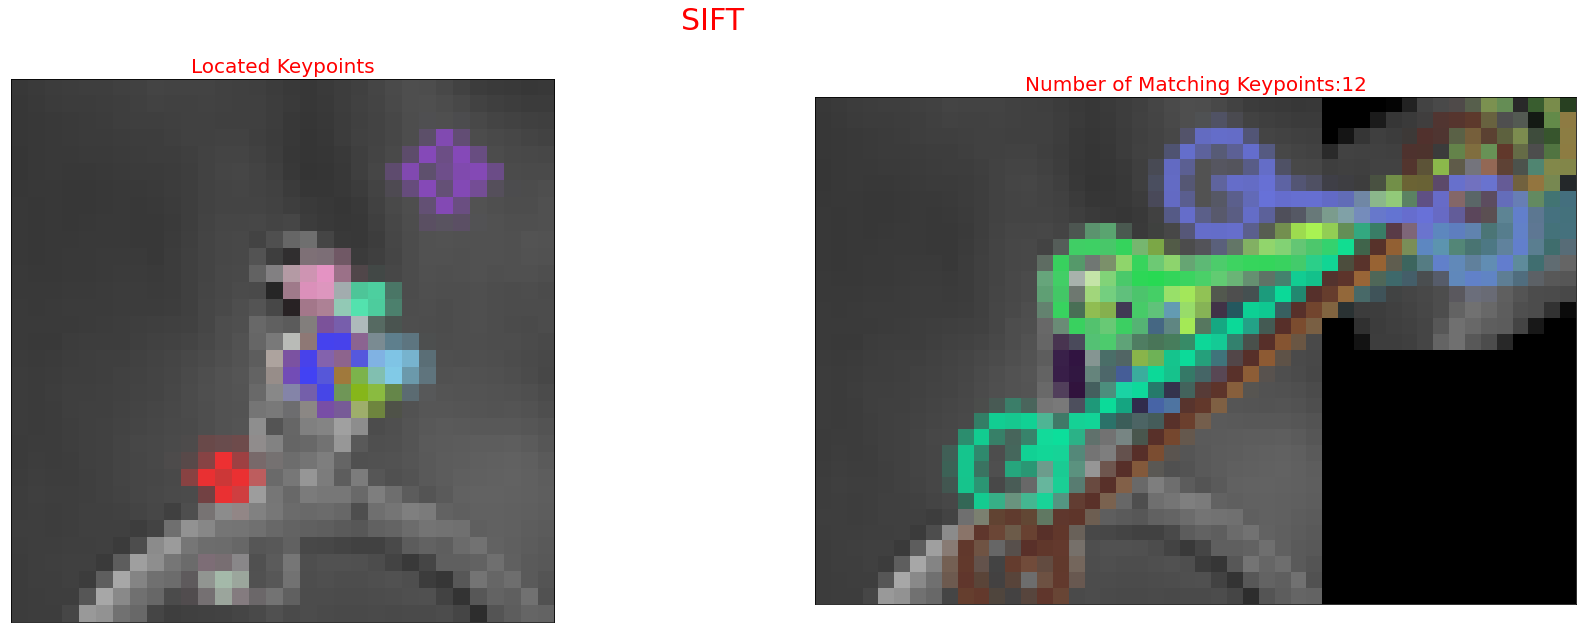

In [162]:
SIFT(bird, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

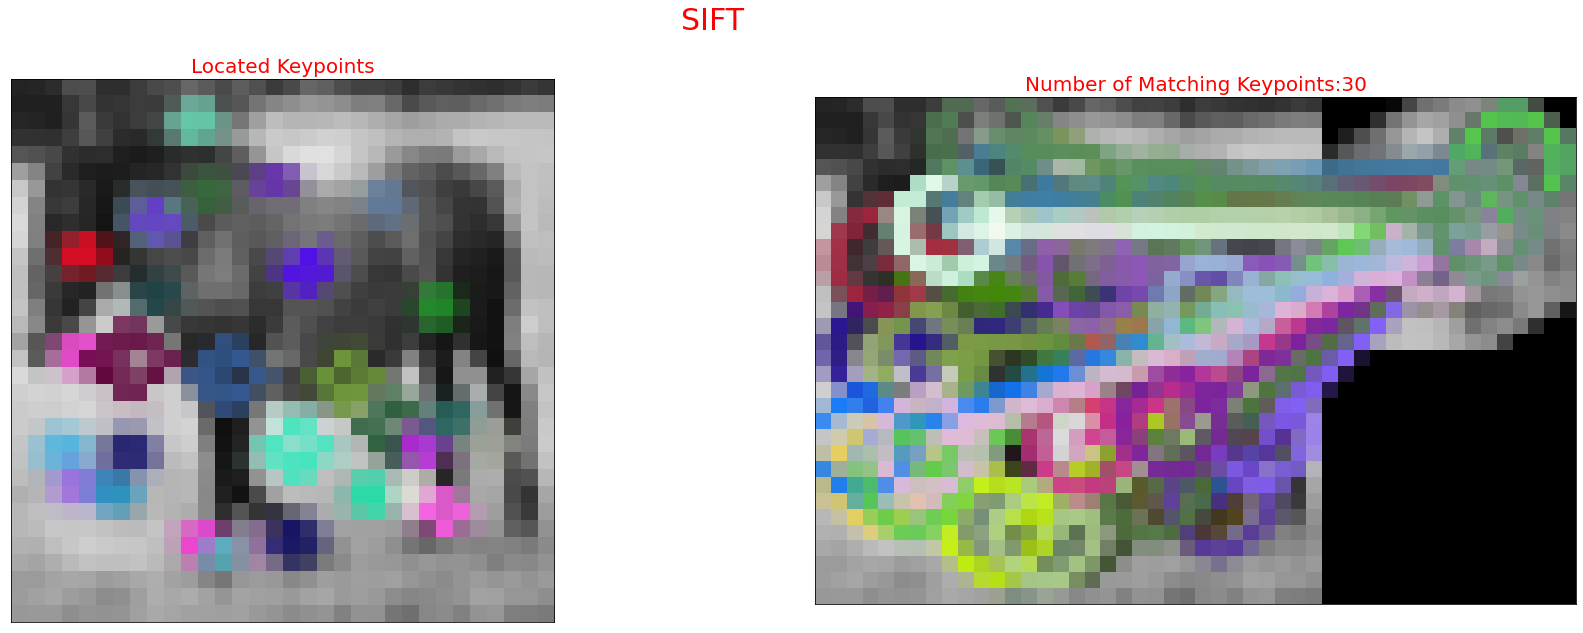

In [163]:
SIFT(horse, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

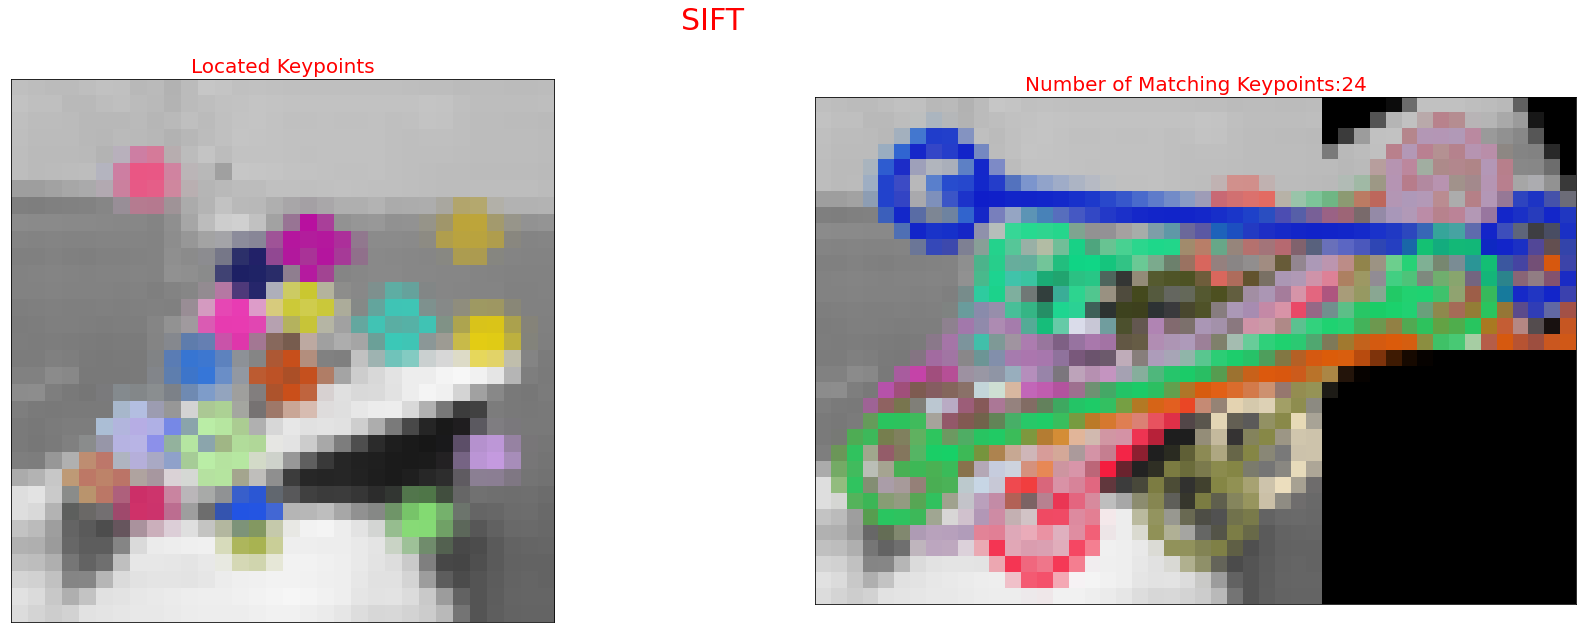

In [164]:
SIFT(ship, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

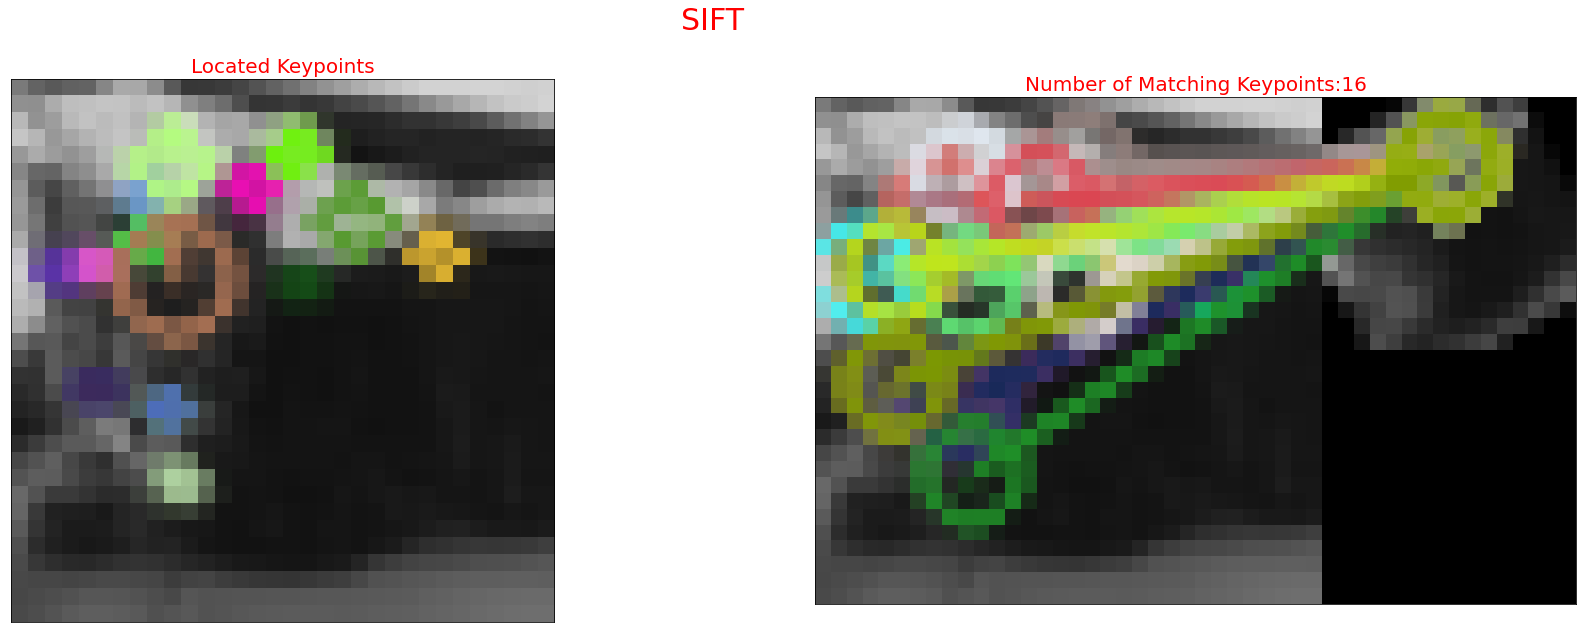

In [177]:
SIFT(cat, contrastThreshold=0.02, edgeThreshold=10, sigma=1.1)

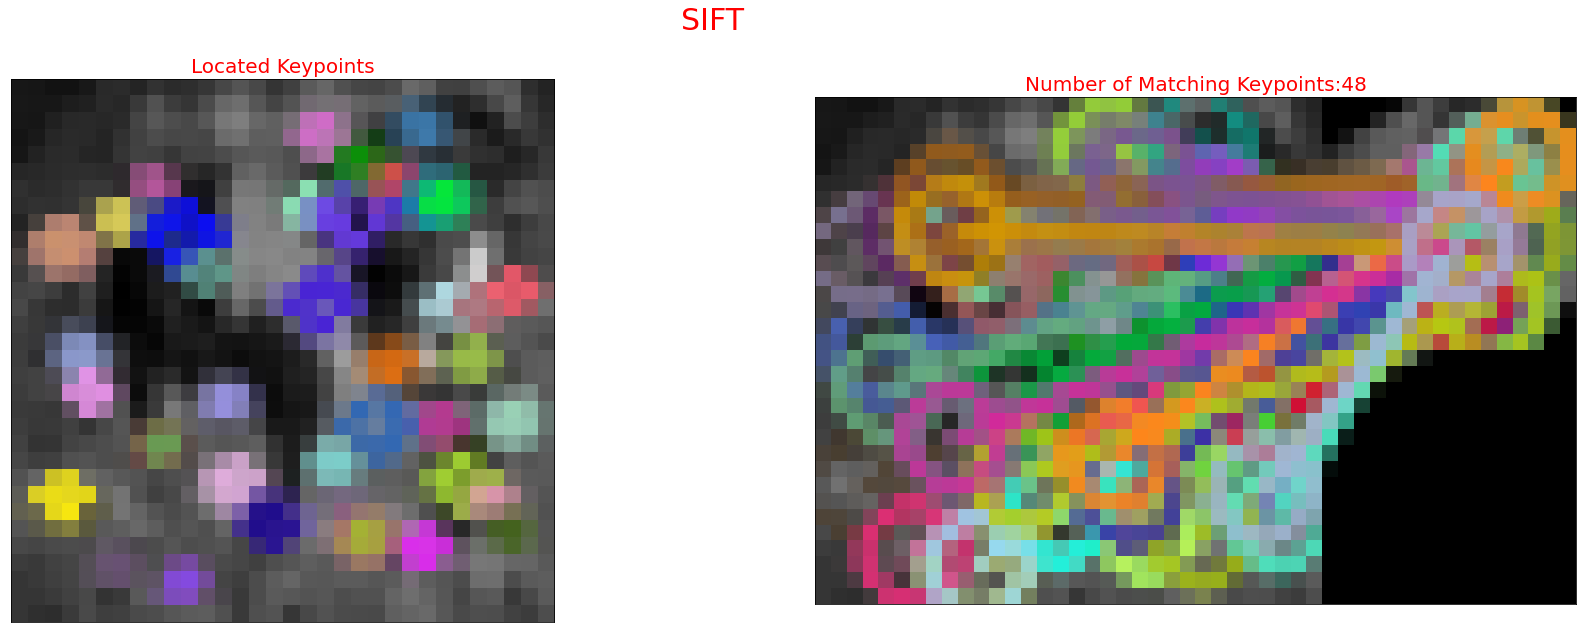

In [166]:
SIFT(dog, contrastThreshold=0.02, edgeThreshold=10, sigma=1)

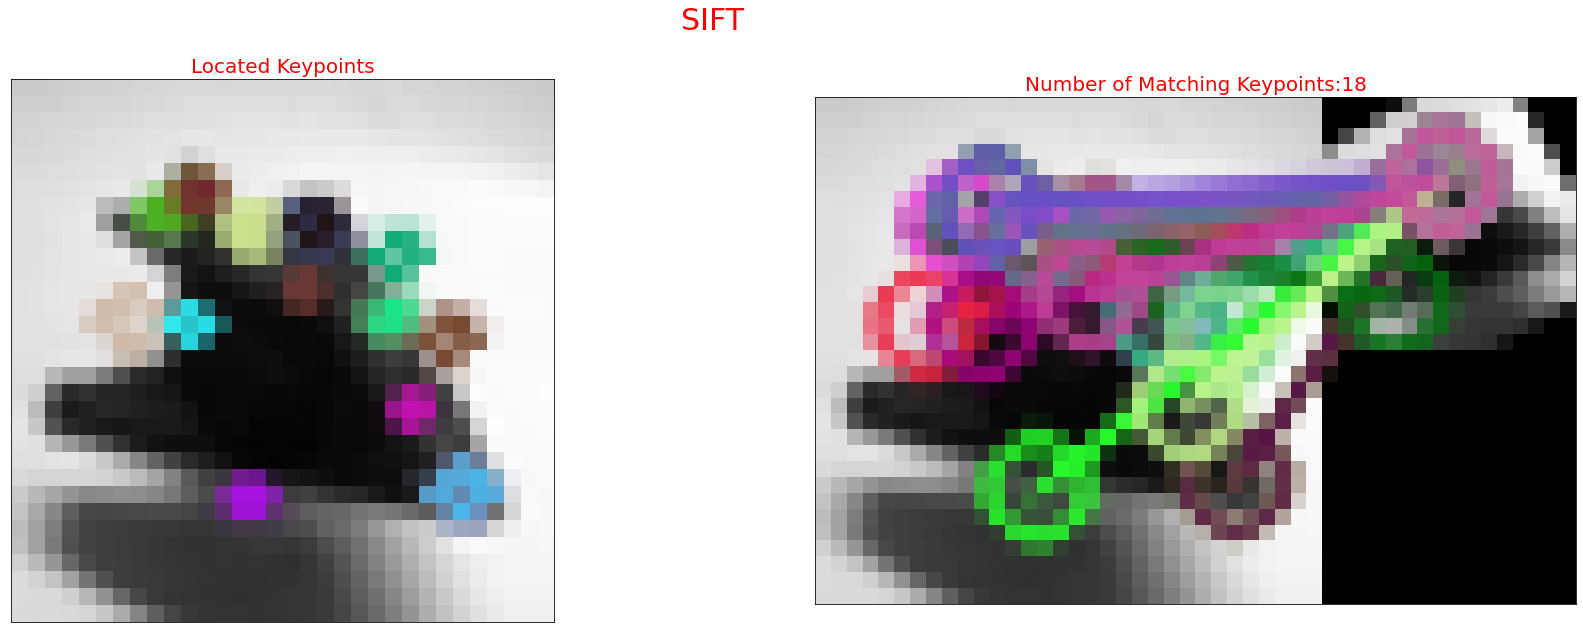

In [167]:
SIFT(plane, contrastThreshold=0.02, edgeThreshold=10, sigma=1)